# Optimizing product shipment for an FMCG company


### Business Problem

An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country.

### Goal & Objective

This exercise aims to build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse. Also, try to analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets.

### Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [4]:
#Checking for perncentage of missing values
df.isnull().mean()*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

### Data Dictionary

1) Warehouse_id : Product warehouse ID
2) WH_Manager_ID : Employee ID of warehouse manager
3) Location_type : Location of the warehouse like city or village
4) WH_capacity_size : Storage capacity size of the warehouse
5) Zone : Zone of the warehouse
6) WH_regional_zone : Regional zone of the warehouse
7) num_refill_req_l3m : Number of times refilling has been done in the last 3 months
8) transport_issue_l1y : Any transport issue like accident or goods stolen reported in the last 1 year
9) Competitor_in_mkt : Number of instant noodles competitors in the market
10) retail_shop_num : Number of retail shops that sell the product under the warehouse area
11) wh_owner_type : Company is owning the warehouse or have they got it on rent
12) distributor_num : Number of distributors between warehouse and retail shops
13) flood_impacted : Warehouse is in the flood impacted area indicator
14) flood_proof : warehouse is a flood proof indicator. Like storage is at some height not flood proof
15) electric_supply : Warehouse has electrical backup like generator so that they can run the warehouse on load shedding
16) dist_from_hub : Distance form the warehouse to the production hub in kms
17) workers_num : Number of workers working in the warehouse
18) wh_est_year : Warehouse establishment year
19) storage_issue_reported_l3m : Warehouse reported storage issue to corporate in the last 3 months. Like rat, fungus because of moisture etc.
20) temp_reg_mach : Warehouse has temperature regulation machine indicator
21) approved_wh_govt_certificate : What kind of certificate has been issued to the warehouse from the government regulatory body
22) wh_breakdown_l3m : Number of times warehouse faced a breakdown in the last 3 months. Like workers strike, electrical failure or flood.
23) govt_check_l3m : Number of times government officers have visited the warehouse to check quality and expiry of stored food in the last 3 months.
#### 24) product_wg_ton : Product has been shipped in the last 3 months. Weight is in tonnes. 

Product shipped in the last 3 months is our target column. Our model has to predict the optimum weight to be shipped in future with the highest possible accuracy based on the given data.



In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


### Initial Observations
- There are 25000 rows
- There are 24 columns
- There are few missing values

- wh_est_year will be dropped as more than 40% data is missing from this column. We will also drop identity related columns as they do not impact our target columns.
- workers_num will be imputed with median value
- Rows with missing approved_wh_govt_certificate will be dropped.

In [6]:
#Dropping columns that do not impact the target
df.drop(columns = ["Ware_house_ID","WH_Manager_ID","wh_est_year"], inplace = True)

#Imputing values
df["workers_num"] = df["workers_num"].fillna(df["workers_num"].median())

#Dropping remaining Nan values
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=["index"])

In [7]:
#Checking unique values in each columns
for col in df.columns:
    print(f"Total no. of unique values in {col} ---> {df[col].nunique()}")
    print(f"{col} ---> {np.unique(df[col])}")
    print("-"*100)

Total no. of unique values in Location_type ---> 2
Location_type ---> ['Rural' 'Urban']
----------------------------------------------------------------------------------------------------
Total no. of unique values in WH_capacity_size ---> 3
WH_capacity_size ---> ['Large' 'Mid' 'Small']
----------------------------------------------------------------------------------------------------
Total no. of unique values in zone ---> 4
zone ---> ['East' 'North' 'South' 'West']
----------------------------------------------------------------------------------------------------
Total no. of unique values in WH_regional_zone ---> 6
WH_regional_zone ---> ['Zone 1' 'Zone 2' 'Zone 3' 'Zone 4' 'Zone 5' 'Zone 6']
----------------------------------------------------------------------------------------------------
Total no. of unique values in num_refill_req_l3m ---> 9
num_refill_req_l3m ---> [0 1 2 3 4 5 6 7 8]
--------------------------------------------------------------------------------------------

In [8]:
#Checking for duplicate values
np.unique(df.duplicated())

array([False])

- We can see that there are no duplicate values
- We have already treated our missing values
- Now our data is ready for further exploration

### Exploratory Data Analysis

While checking unique values in our columns, we can see that there are columns with continuous variables and categorical variables. Some columns contain numerical values but they have to be treated as categorical variables under required circumstances. We will explore data based on this.

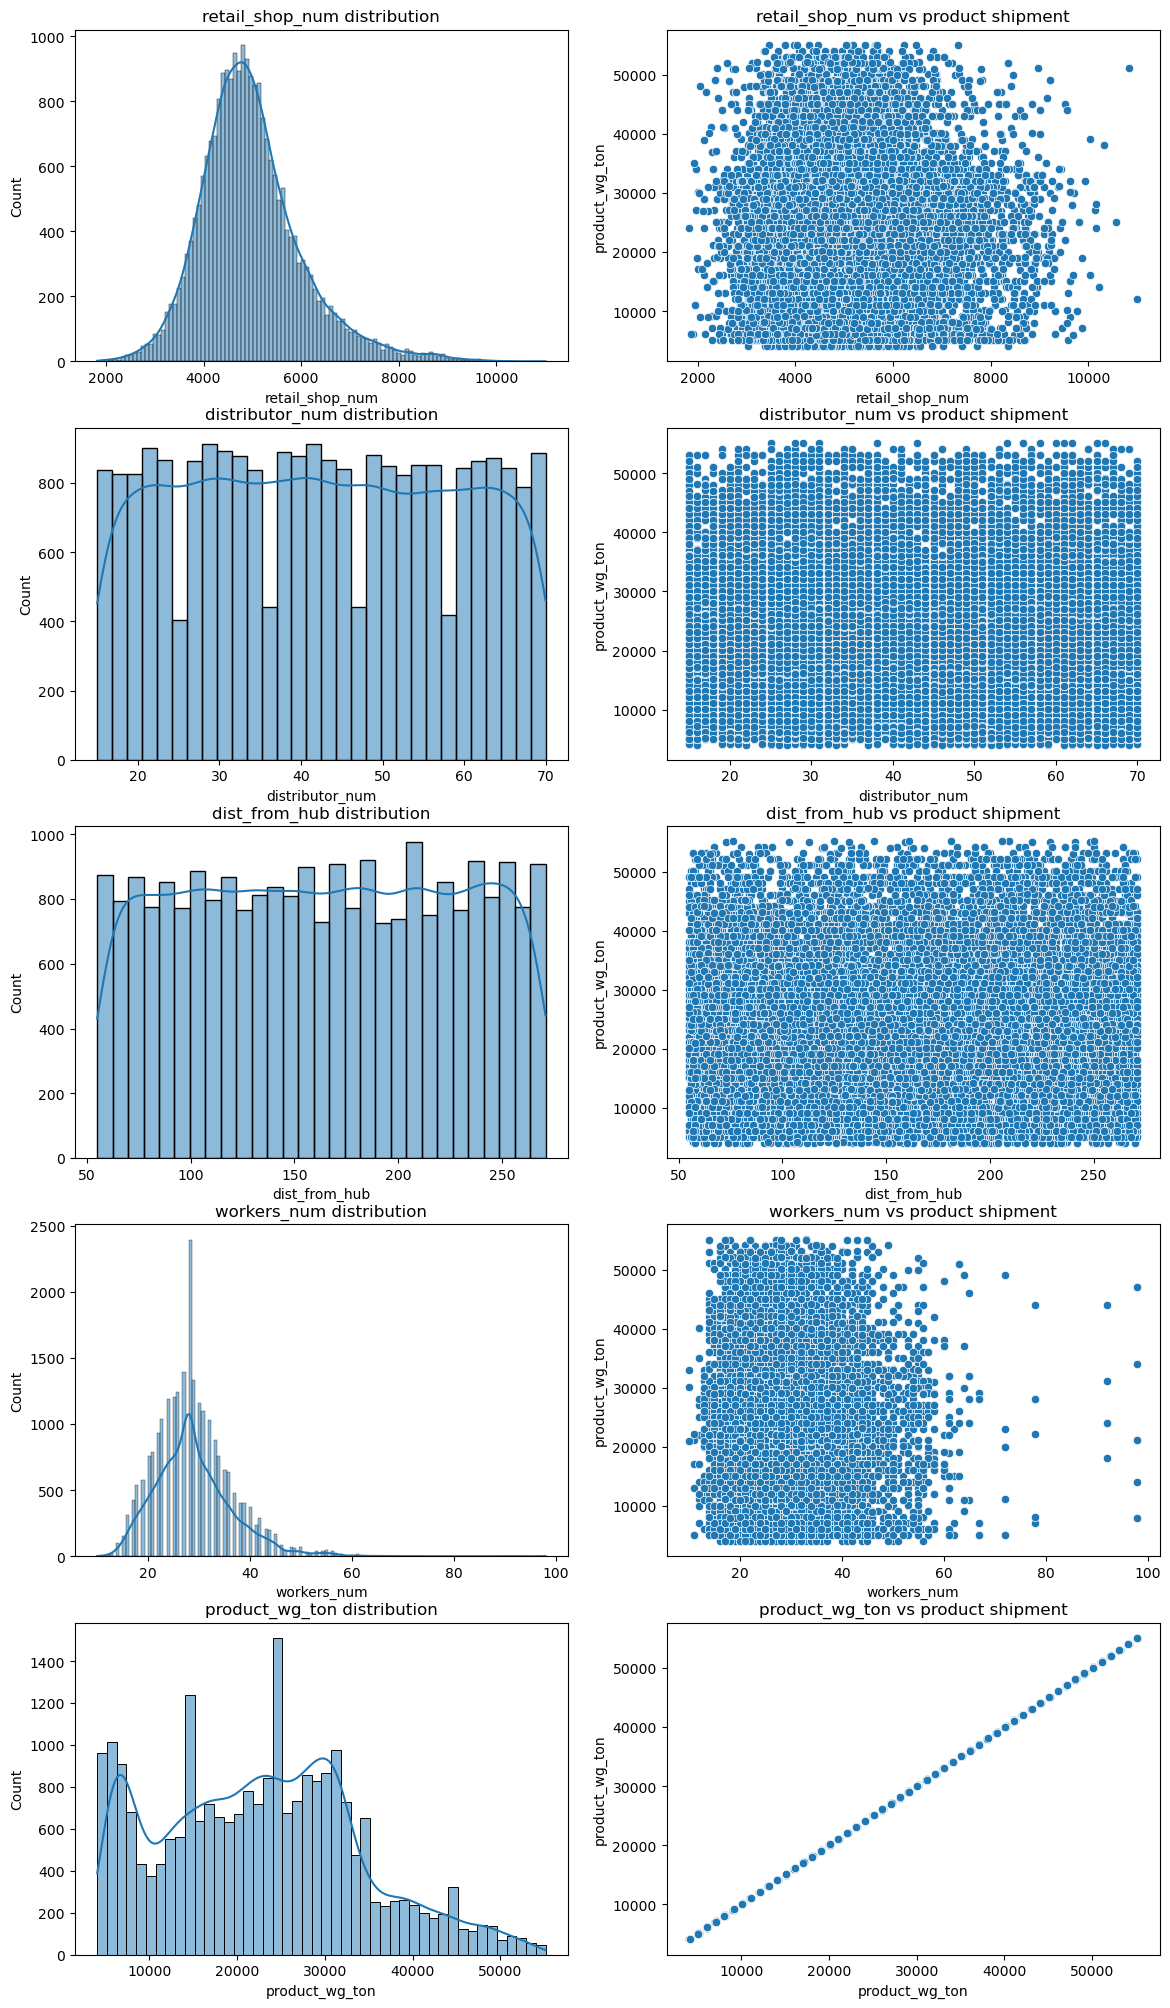

In [9]:
#Comparing distribution of continuous variables 
cont = ['retail_shop_num','distributor_num','dist_from_hub','workers_num','product_wg_ton']
c = 0
r = 0
f, axes = plt.subplots(5,2,figsize=(14,25))
for con in cont:
    ax = sns.histplot(data = df[con], kde=True, ax = axes[r,0])
    ax.set(title = f"{con} distribution")
    ax = sns.scatterplot(x = df[con], y = df['product_wg_ton'], ax = axes[r,1])
    ax.set(title = f"{con} vs product shipment")
    r = r + 1

- The distribution of number of retail shops and number of workers in warehouse are right skewed indicating outliers in these columns. 
- The distribution of distance from hub and number of distributors is fairly uniform. 
- The distribution of quantity of product shipment is has no particular pattern. The quantity decreases uniformly after 35000 tonnes.
- No particular pattern is present for all of the above variables with respect to product shipment.

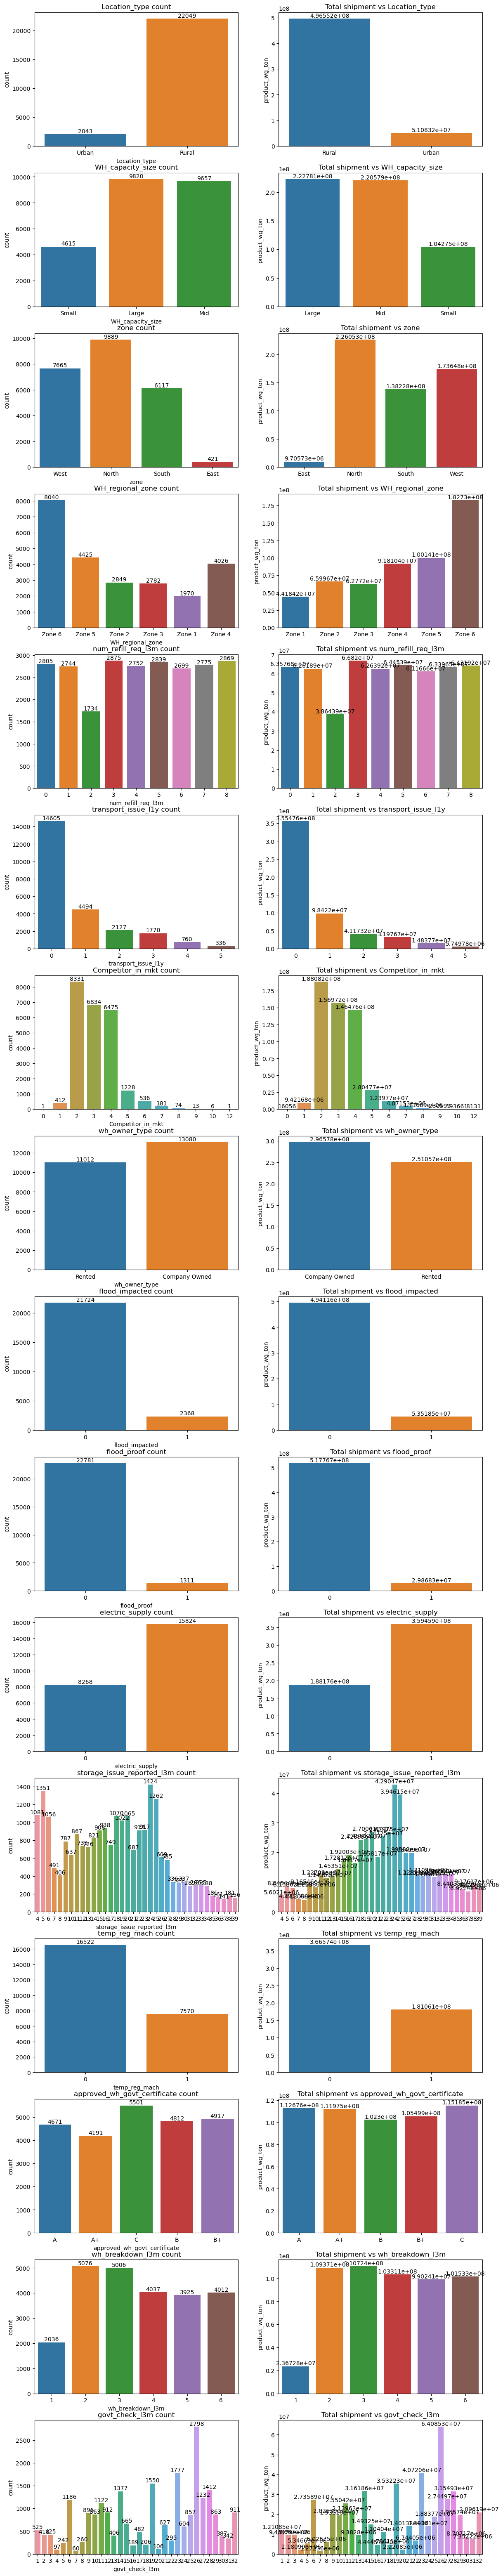

In [10]:
#Comparing distribution of categorical variables
cat = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'wh_owner_type', 'flood_impacted',
       'flood_proof', 'electric_supply',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
      ]

r = 0
f, axes = plt.subplots(16,2,figsize=(14,80))
for col in cat:
    ax1 = sns.countplot(x = df[col], ax = axes[r,0])
    ax1.set(title = f"{col} count")
    for i in ax1.containers:
        ax1.bar_label(i)
    grp = df.groupby([col]).sum()
    y = grp['product_wg_ton']
    x = np.unique(df[col])    
    ax2 = sns.barplot(x=x,y=y,ax=axes[r,1])
    ax2.set(title=f"Total shipment vs {col}")
    for i in ax2.containers:
            ax2.bar_label(i) 
    r = r + 1

Comparison between distribution of count and total shipment:- 
- Most warehouse records belong to Rural location. Rural location has a very high total shipment.
- Majority of warehouse capacities are of Large and mid sizes. Large and mid size warehouses have highest shipments.
- North zone has maximum records. North zone has highest shipment
- Zone 6 has maximum records. Zone 6 has highest shipment.
- Number of refills in the last 3 months has a fairly similar distribution except 2 refills. All refills have similar quantities of shipments except 2 times.
- Most records have 0 transport issues in the last 1 year. Lowest transportation issues has highest shipment.
- Majority records have 2,3 or 4 competitors in the market. Where number of competitors are 2,3,4 there are highest shipments.
- Company owned warehouses are more in number. Company owned warehouses are getting higher quantity shipments.
- Most warehouses are not in flood impacted areas. Warehouses not in flood impacted areas have higher quantity shipments.
- Most warehouses are also not flood proofed. Flood proofed warehouses also have lower shipment volume because of lower number of such warehouses.
- Higher number of warehouses have electrical supply. Warehouses with electrical supply has significantly high shipment.
- There is uneven distribution of storage issues reported in the last 3 months. But the trend decreases after 42 issues. Total shipment to warehouses with storage issues is almost normally distributed.
- A larger number of warehouses do not have temperature regulating machine. Temperature regulated warehouses have a low total shipment quantity.
- The highest number of warehouses have C grading from the government. C graded warehouses has highest shipment closely followed by A+ graded.
- Majority of warehouses broke down 2 or 3 times in the last 3 months. Warehouses with 2 or 3 breakdowns has highest shipment.
- There is no partivular pattern of distribution in the number of government checks that happened in the last 3 months. The number of govt checks has no impact on quantity of shipments received.

### Why are we checking with total volume of product?

For FMCG, especially edible items, it is the volume of sale that ultimately matters. They are not highly priced. So, the faster they are moving from the warehouses to the retailers, the more profitable the business is going to be. The more demand, the more retailers will take the product. So, we need to look at the volume of product that is moving. This will help us in understanding the population and demand.

To rural areas, higher volume is flowing. So we must check how the product is getting distributed in this area. Naturally there is demand and more scope for pushing the product in rural areas looking at the numbers. Overall profitability can be increased if the product can make a higher revenue compared to the costs incurred.

### Data Exploration more in detail

Let us do some granular exploration by subdividing our data according to regional zones.

In [11]:
df_north_rur = df[(df['zone']=="North") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_north_urb = df[(df['zone']=="North") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_east_rur = df[(df['zone']=="East") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_east_urb = df[(df['zone']=="East") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_south_rur = df[(df['zone']=="South") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_south_urb = df[(df['zone']=="South") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_west_rur = df[(df['zone']=="West") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_west_urb = df[(df['zone']=="West") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')

### Count of warehouses

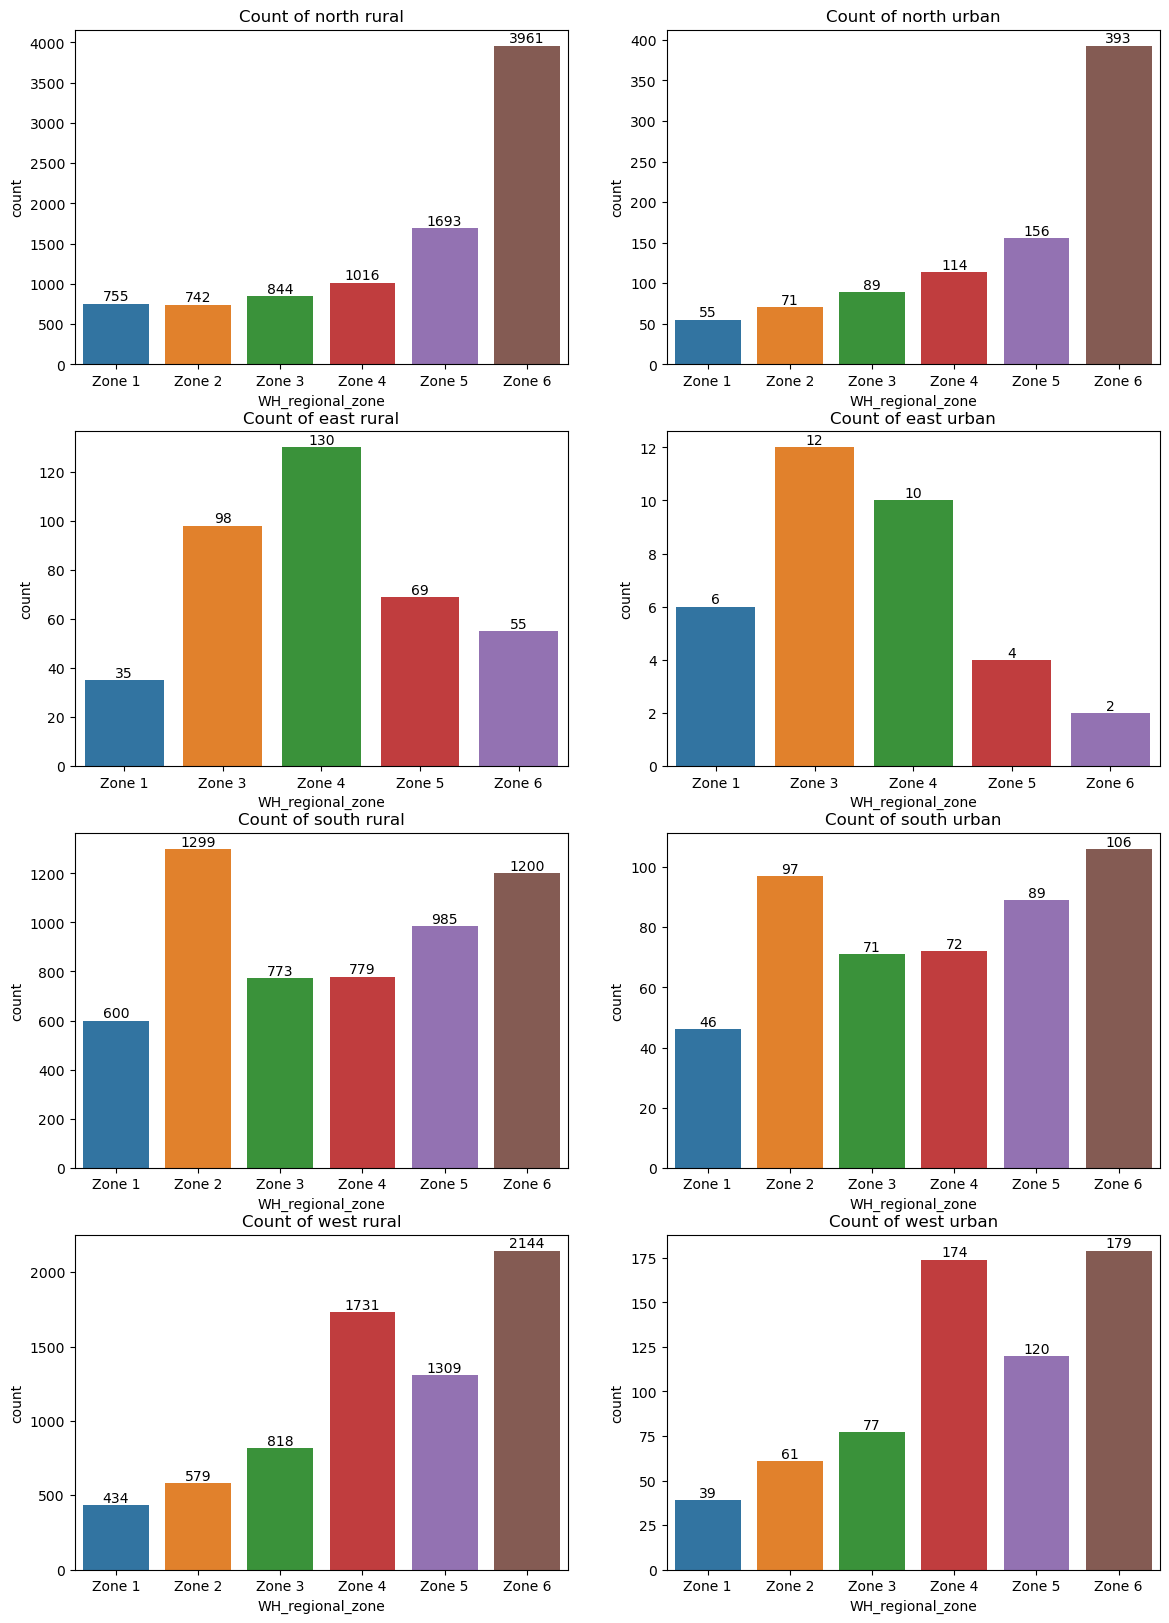

In [12]:
f,axes = plt.subplots(4,2,figsize=(14,20))
ax = sns.countplot(x = df_north_rur["WH_regional_zone"],ax = axes[0,0])
ax.set(title=f"Count of north rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_north_urb["WH_regional_zone"],ax = axes[0,1])
ax.set(title=f"Count of north urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_east_rur["WH_regional_zone"],ax = axes[1,0])
ax.set(title=f"Count of east rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_east_urb["WH_regional_zone"],ax = axes[1,1])
ax.set(title=f"Count of east urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_south_rur["WH_regional_zone"],ax = axes[2,0])
ax.set(title=f"Count of south rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_south_urb["WH_regional_zone"],ax = axes[2,1])
ax.set(title=f"Count of south urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_west_rur["WH_regional_zone"],ax = axes[3,0])
ax.set(title=f"Count of west rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_west_urb["WH_regional_zone"],ax = axes[3,1])
ax.set(title=f"Count of west urban")
for i in ax.containers:
    ax.bar_label(i)

    - North - Rural --> Maximum = Zone-6 = 3961 & Minimum = Zone-2 = 742  
    - East  - Rural --> Maximum = Zone-4 = 130  & Minimum = Zone-1 = 35   
    - South - Rural --> Maximum = Zone-2 = 1299 & Minimum = Zone-1 = 600   
    - West  - Rural --> Maximum = Zone-6 = 2144 & Minimum = Zone-1 = 434
    
    - North - Urban --> Maximum = Zone-6 = 393 & Minimum = Zone-1 = 55   
    - East  - Urban --> Maximum = Zone-3 = 12  & Minimum = Zone-6 = 2   
    - South - Urban --> Maximum = Zone-6 = 106 & Minimum = Zone-1 = 46  
    - West  - Urban --> Maximum = Zone-6 = 179 & Minimum = Zone-1 = 39   
    
- In rural areas, North - Zone-6 has maximum number of warehouses and East Zone-1 has minimum number of warehouses.
- In Urban areas, North - Zone-6 has maximum number of warehouses and East Zone-6 has minimum number of warehouses.

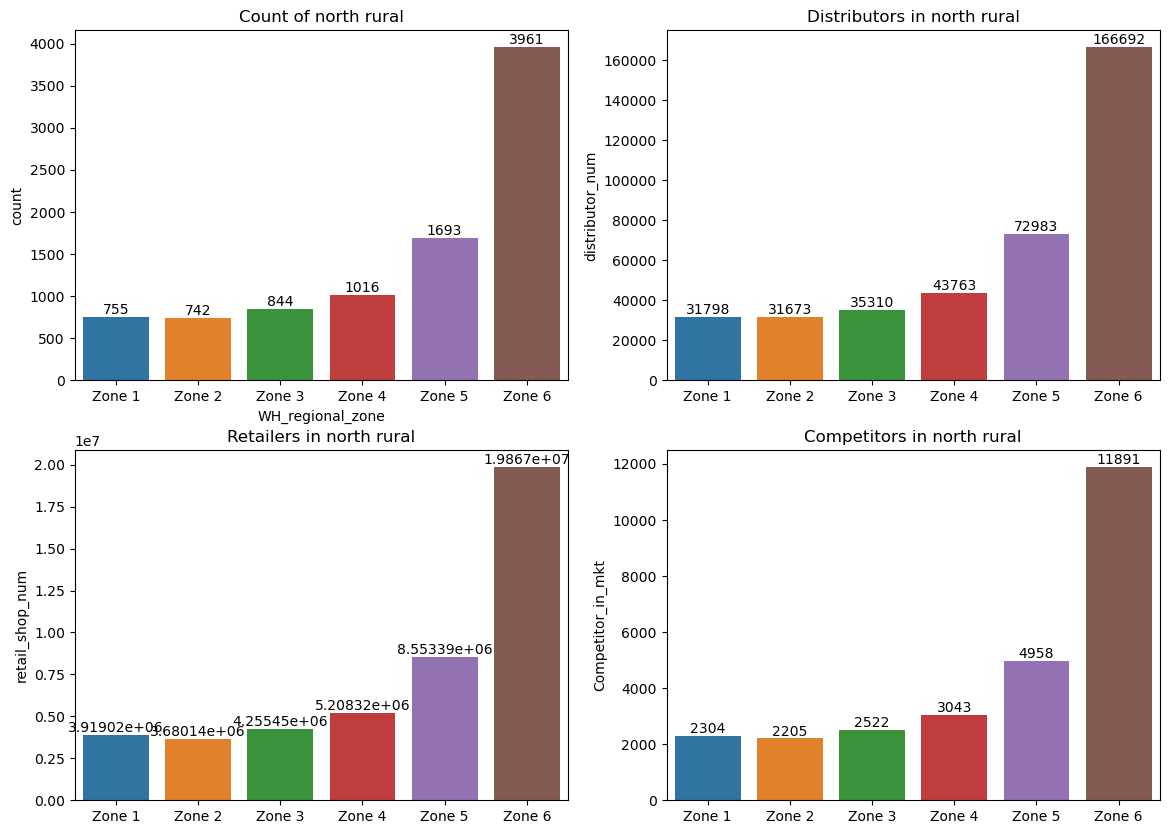

In [13]:
f,axes = plt.subplots(2,2,figsize=(14,10))

ax = sns.countplot(x = df_north_rur["WH_regional_zone"],ax = axes[0,0])
ax.set(title=f"Count of north rural")
for i in ax.containers:
    ax.bar_label(i)
grp = df_north_rur.groupby(["WH_regional_zone"]).sum()
y = grp['distributor_num']
x = np.unique(df_north_rur["WH_regional_zone"])    
ax = sns.barplot(x=x,y=y,ax=axes[0,1])
ax.set(title=f"Distributors in north rural")
for i in ax.containers:
    ax.bar_label(i)
y = grp['retail_shop_num']
x = np.unique(df_north_rur["WH_regional_zone"])    
ax = sns.barplot(x=x,y=y,ax=axes[1,0])
ax.set(title=f"Retailers in north rural")
for i in ax.containers:
    ax.bar_label(i)
y = grp['Competitor_in_mkt']
x = np.unique(df_north_rur["WH_regional_zone"])
ax = sns.barplot(x=x,y=y,ax=axes[1,1])
ax.set(title=f"Competitors in north rural")
for i in ax.containers:
    ax.bar_label(i)

North rural Zone-6 has most warehouses and Zone-2 has least. The numbers of distributors, retailers and competitors are also following the same trend as the count of warehouses. So, we can infer that the distribution of distributors and retailers and the number of warehouses in the region are related. The overall count of warehouses denotes the demand and the population.  

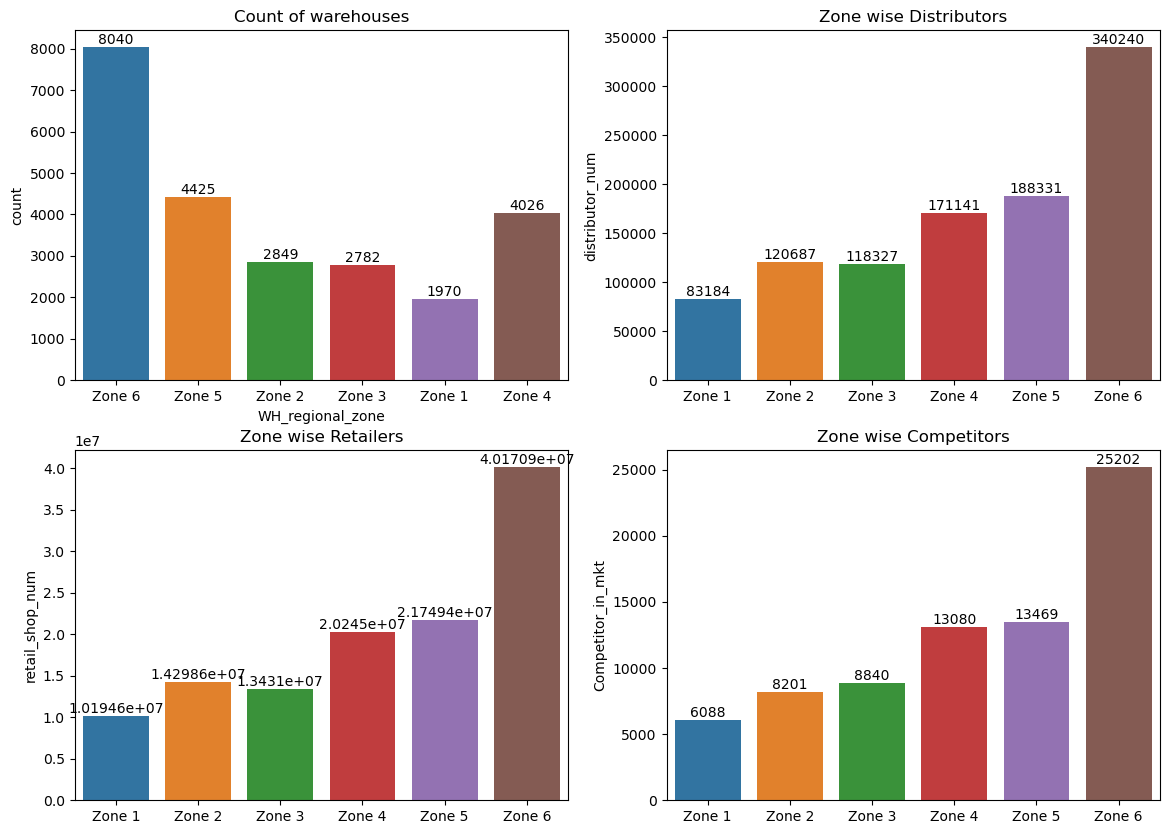

In [14]:
f,axes = plt.subplots(2,2,figsize=(14,10))
ax = sns.countplot(x = df["WH_regional_zone"],ax = axes[0,0])
ax.set(title=f"Count of warehouses")
for i in ax.containers:
    ax.bar_label(i)
grp = df.groupby(["WH_regional_zone"]).sum()
y = grp['distributor_num']
x = np.unique(df["WH_regional_zone"])    
ax = sns.barplot(x=x,y=y,ax=axes[0,1])
ax.set(title=f"Zone wise Distributors")
for i in ax.containers:
    ax.bar_label(i)
y = grp['retail_shop_num']
x = np.unique(df["WH_regional_zone"])    
ax = sns.barplot(x=x,y=y,ax=axes[1,0])
ax.set(title=f"Zone wise Retailers")
for i in ax.containers:
    ax.bar_label(i)
y = grp['Competitor_in_mkt']
x = np.unique(df["WH_regional_zone"])
ax = sns.barplot(x=x,y=y,ax=axes[1,1])
ax.set(title=f"Zone wise Competitors")
for i in ax.containers:
    ax.bar_label(i)

The overall region-wise distribution also follows the same pattern

### Mean distance from hub of warehouses in each region

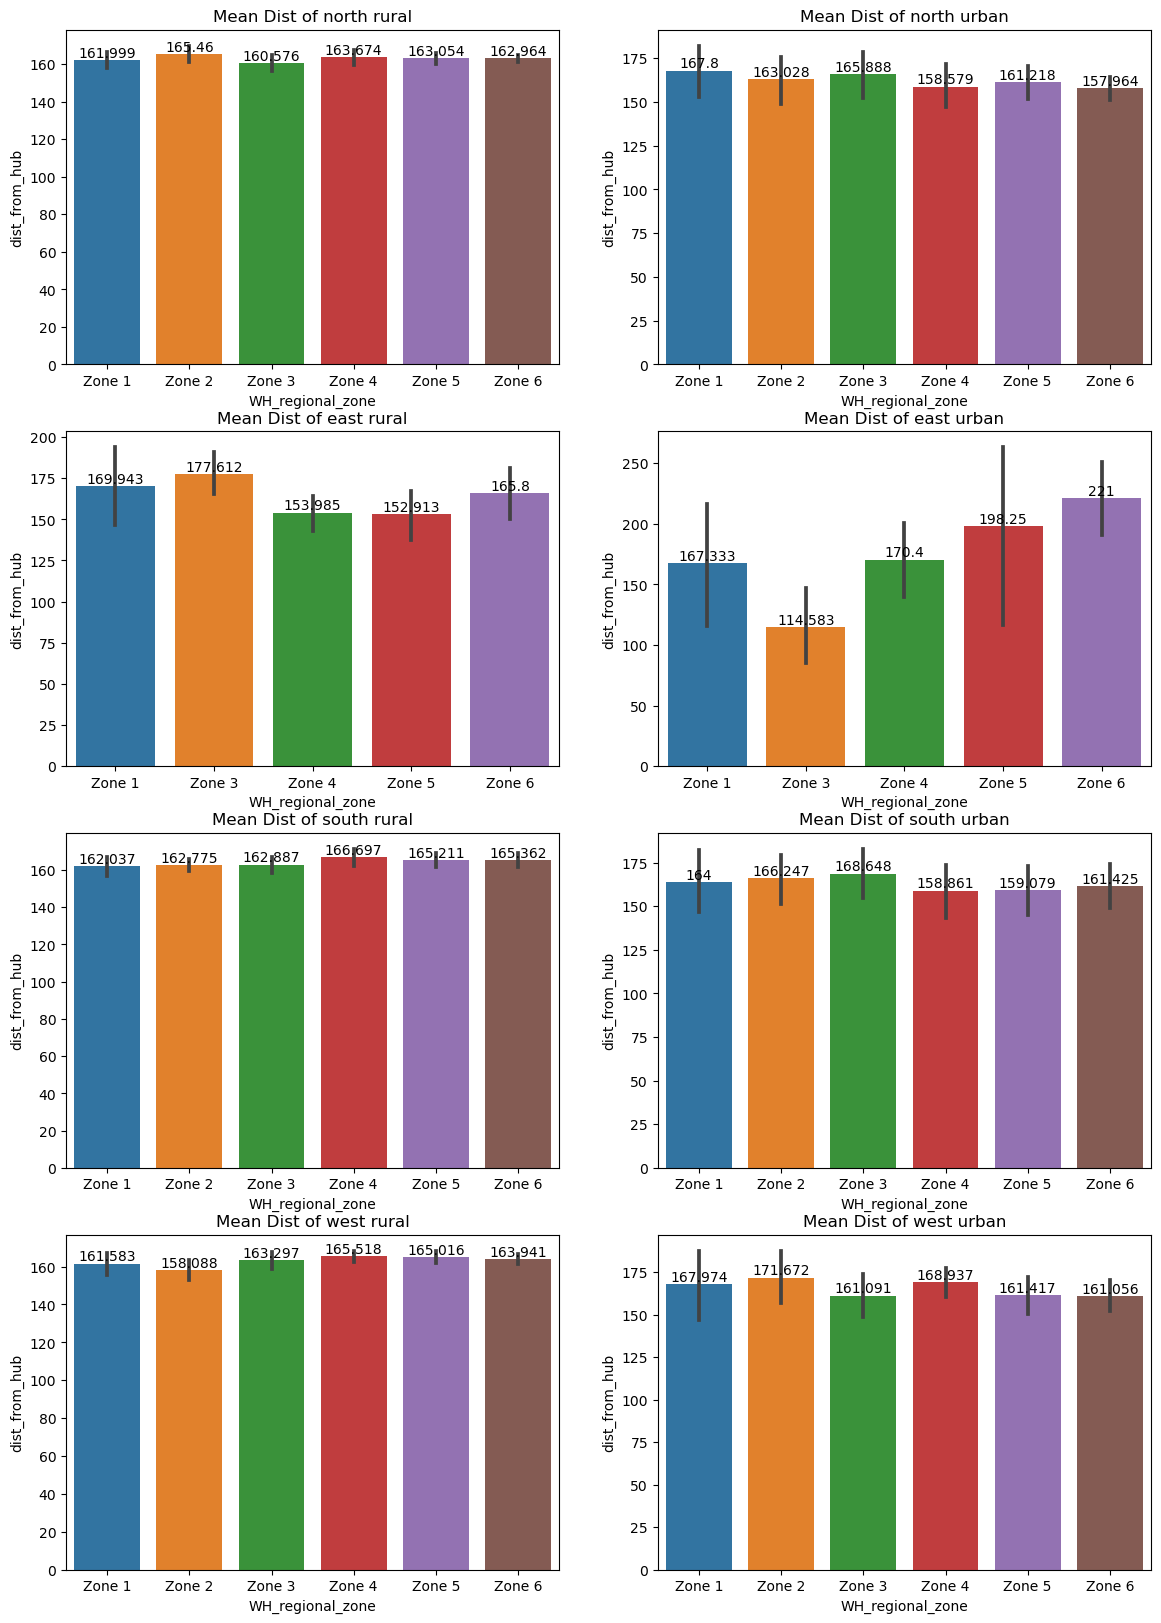

In [12]:
f,axes = plt.subplots(4,2,figsize=(14,20))
ax = sns.barplot(x = df_north_rur["WH_regional_zone"],y=df_north_rur["dist_from_hub"],ax = axes[0,0])
ax.set(title=f"Mean Dist of north rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_north_urb["WH_regional_zone"],y=df_north_urb["dist_from_hub"],ax = axes[0,1])
ax.set(title=f"Mean Dist of north urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_east_rur["WH_regional_zone"],y=df_east_rur["dist_from_hub"],ax = axes[1,0])
ax.set(title=f"Mean Dist of east rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_east_urb["WH_regional_zone"],y=df_east_urb["dist_from_hub"],ax = axes[1,1])
ax.set(title=f"Mean Dist of east urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_south_rur["WH_regional_zone"],y=df_south_rur["dist_from_hub"],ax = axes[2,0])
ax.set(title=f"Mean Dist of south rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_south_urb["WH_regional_zone"],y=df_south_urb["dist_from_hub"],ax = axes[2,1])
ax.set(title=f"Mean Dist of south urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_west_rur["WH_regional_zone"],y=df_west_rur["dist_from_hub"],ax = axes[3,0])
ax.set(title=f"Mean Dist of west rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_west_urb["WH_regional_zone"],y=df_west_urb["dist_from_hub"],ax = axes[3,1])
ax.set(title=f"Mean Dist of west urban")
for i in ax.containers:
    ax.bar_label(i)

Count of warehouses:

    - North - Rural --> Maximum = Zone-6 = 3961 & Minimum = Zone-2 = 742  
    - East  - Rural --> Maximum = Zone-4 = 130  & Minimum = Zone-1 = 35   
    - South - Rural --> Maximum = Zone-2 = 1299 & Minimum = Zone-1 = 600   
    - West  - Rural --> Maximum = Zone-6 = 2144 & Minimum = Zone-1 = 434
    
    - North - Urban --> Maximum = Zone-6 = 393 & Minimum = Zone-1 = 55   
    - East  - Urban --> Maximum = Zone-3 = 12  & Minimum = Zone-6 = 2   
    - South - Urban --> Maximum = Zone-6 = 106 & Minimum = Zone-1 = 46  
    - West  - Urban --> Maximum = Zone-6 = 179 & Minimum = Zone-1 = 39   
    
- In rural areas, North - Zone-6 has maximum number of warehouses and East Zone-1 has minimum number of warehouses.
- In Urban areas, North - Zone-6 has maximum number of warehouses and East Zone-6 has minimum number of warehouses.

Mean distance from hub

    - North - Rural --> Maximum = Zone-2 = 165.45 & Minimum = Zone-3 = 160.57  
    - East  - Rural --> Maximum = Zone-3 = 177.61  & Minimum = Zone-4 = 153.98  
    - South - Rural --> Maximum = Zone-4 = 166.69 & Minimum = Zone-1 = 162.03   
    - West  - Rural --> Maximum = Zone-4 = 165.52 & Minimum = Zone-2 = 158.08
    
    - North - Urban --> Maximum = Zone-1 = 167.8 & Minimum = Zone-6 = 157.96   
    - East  - Urban --> Maximum = Zone-6 = 221  & Minimum = Zone-3 = 114.58   
    - South - Urban --> Maximum = Zone-3 = 168.65 & Minimum = Zone-4 = 158.86  
    - West  - Urban --> Maximum = Zone-2 = 171.67 & Minimum = Zone-6 = 161.056 
    
### Findings-1
    
- In Rural areas, East - Zone-3 has maximum mean distance of warehouses from hub and East Zone-4 has minimum mean distance of warehouses from hub.
- In Urban areas, East - Zone-6 has maximum mean distance of warehouses from hub and East Zone-3 has minimum mean distance of warehouses from hub.
- In urban areas, we can see that minimum mean distance from the hub is having maximum number of warehouses (except south urban). 
- In rural areas, the above mentioned pattern is not consistent. This may be because even if the distance from hub is more, the demand might be compensating for the cost incurred. Hence, warehouses have been located inspite of the distance. 

### Inferences-1
- North zone has the most demand.
- Rural areas have more demand.
- We can see that the mean maximum and minimum distances from hub of urban areas are almost comparable to mean maximum and minimum distances from hub of rural areas inspite of significantly lower number of warehouses in urban areas. This means that warehouses in urban areas are more distantly located from the hub than rural areas. The hub might be located at a place that is closer to rural areas.
- East zone is the farthest from the manufacturing hub.
- There might be correlation between number of distributors, retailers and competitors which needs to addressed later.
- North rural Zone-6 has most warehouses and Zone-2 has least. The numbers of distributors, retailers and competitors are also following the same trend as the count of warehouses. So, we can infer that the distribution of distributors and retailers depend on the number of warehouses in the region. The overall count of warehouses denotes the demand and the population.  
- It is prudent to increase advertising and campaigns to increase turnover in Rural location of North zone. 

### Distribution of capacity of warehouse in each region

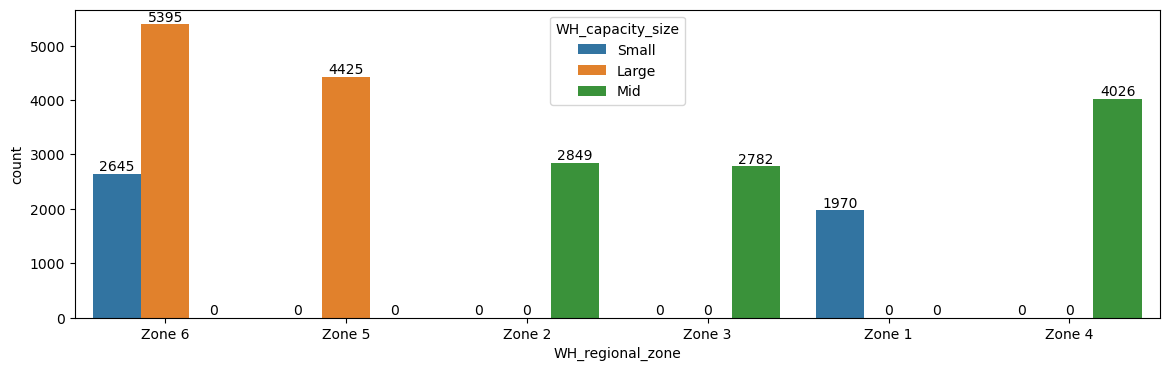

In [13]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x = df["WH_regional_zone"], hue = df["WH_capacity_size"])
for i in ax.containers:
    ax.bar_label(i)


### Finding-2

- We can see that all of larger counts of warehouses are of Large and Mid type. These indicate higher demand. 
- The large warehouses are all located in Zone-6 and 5. The mid categories are located in Zones 4,3,2. The small categories are all located in zones 1 and 6. All these are irrespective of rural and urban classification.
- This can mean that these particular regions have the requisite population distribution or demand. We can infer that Zones 5 and 6 in general have higher demand or higher population and so on.
 

### Inference - 2
We can see that Zone-6 or 5 do not have the minimum mean distance from the hub. But they have highest number of warehouses and also have all the large category warehouses. This means that although distance from hub has an impact on the number of warehouses located, it is mainly the demand that is influencing the location and category of warehouse. This will impact the quantity of shipment. Distance from hub will have an indirect impact in terms of trasnportation issues and trasnportation cost.

### ---

While demand drives the sales and revenue aspect, cost is another factor that affects the overall profitability. Next we need to see the cost aspects in our data. The number of refills, warehouse issues, trasnportation issues and distance of warehouse from hub drive the overhead costs. We need to minimize these costs.

While direct or indirect costs are not given in the data, let us assume that each km of distance from hub is a unit of currency. So the number of refills increase the cost.

We create a column to measure our transport costs in the last 3 months based on this.

In [14]:
df["transport_cost_l3m"] = df["dist_from_hub"] * df["num_refill_req_l3m"]
df_north_rur = df[(df['zone']=="North") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_north_urb = df[(df['zone']=="North") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_east_rur = df[(df['zone']=="East") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_east_urb = df[(df['zone']=="East") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_south_rur = df[(df['zone']=="South") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_south_urb = df[(df['zone']=="South") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_west_rur = df[(df['zone']=="West") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_west_urb = df[(df['zone']=="West") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')

### Mean cost of transportation 

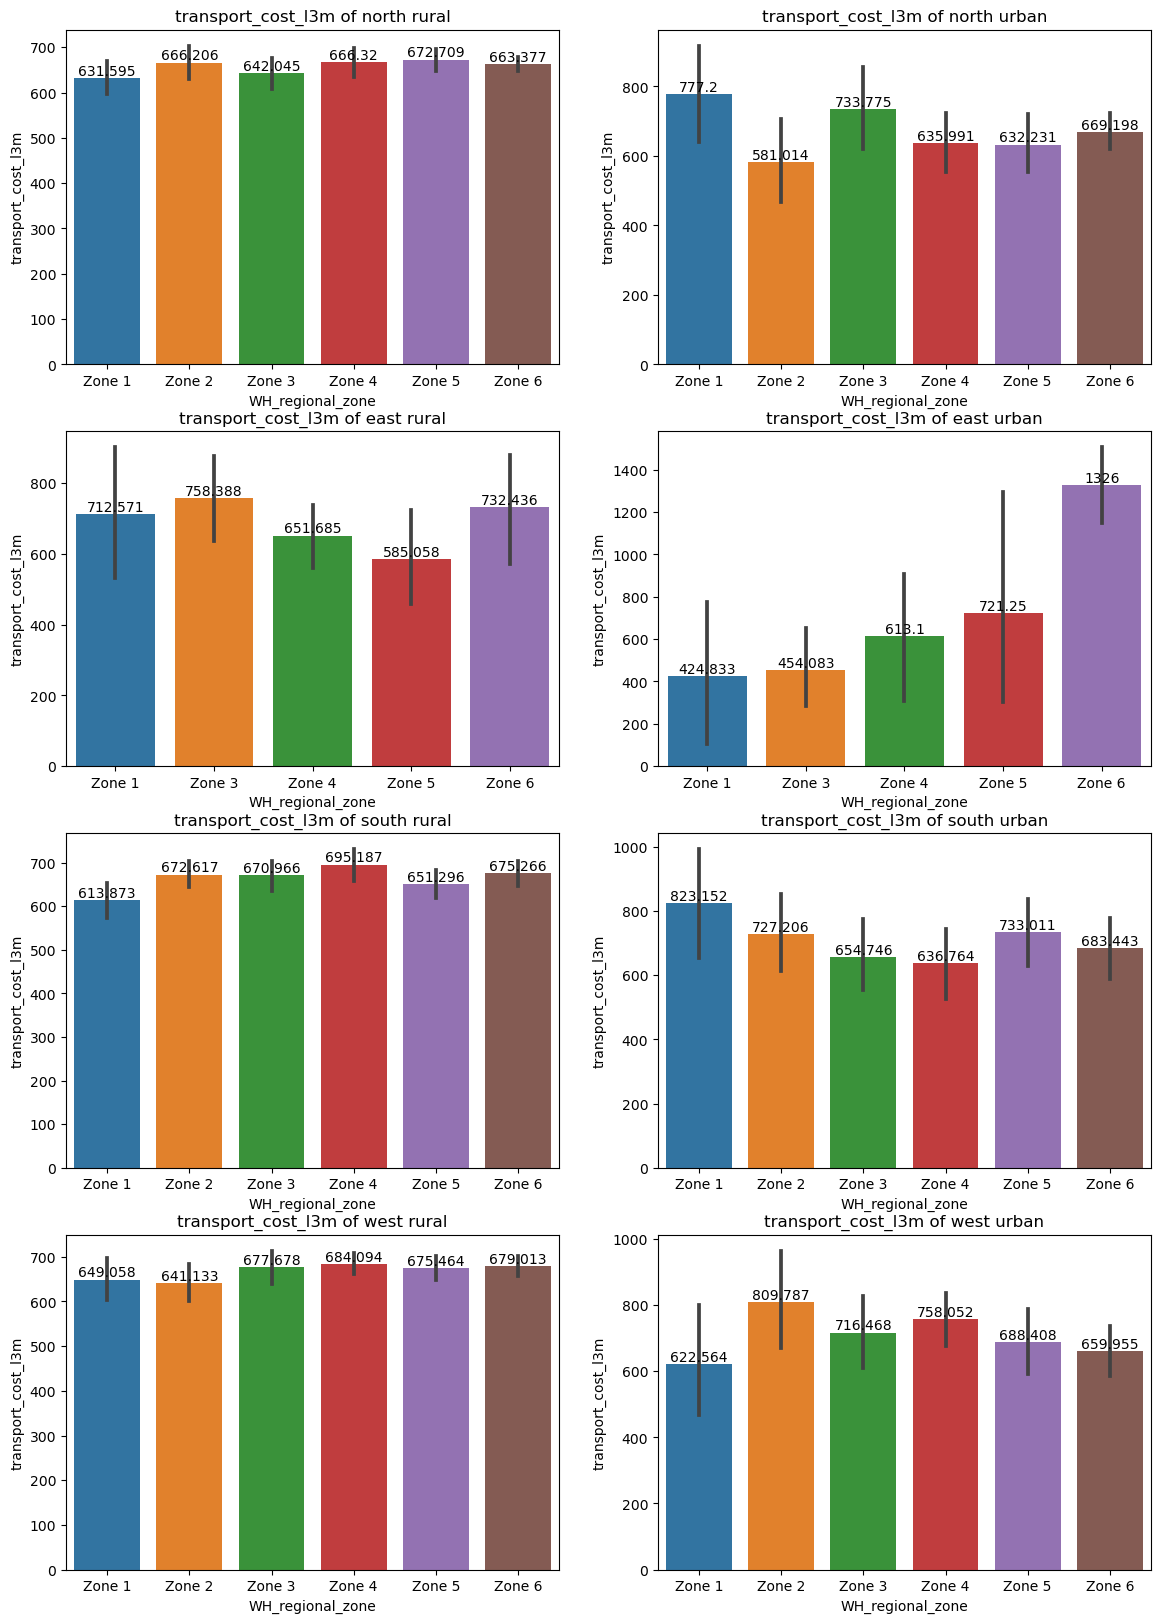

In [15]:
f,axes = plt.subplots(4,2,figsize=(14,20))
ax = sns.barplot(x = df_north_rur["WH_regional_zone"],y=df_north_rur["transport_cost_l3m"],ax = axes[0,0])
ax.set(title=f"transport_cost_l3m of north rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_north_urb["WH_regional_zone"],y=df_north_urb["transport_cost_l3m"],ax = axes[0,1])
ax.set(title=f"transport_cost_l3m of north urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_east_rur["WH_regional_zone"],y=df_east_rur["transport_cost_l3m"],ax = axes[1,0])
ax.set(title=f"transport_cost_l3m of east rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_east_urb["WH_regional_zone"],y=df_east_urb["transport_cost_l3m"],ax = axes[1,1])
ax.set(title=f"transport_cost_l3m of east urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_south_rur["WH_regional_zone"],y=df_south_rur["transport_cost_l3m"],ax = axes[2,0])
ax.set(title=f"transport_cost_l3m of south rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_south_urb["WH_regional_zone"],y=df_south_urb["transport_cost_l3m"],ax = axes[2,1])
ax.set(title=f"transport_cost_l3m of south urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_west_rur["WH_regional_zone"],y=df_west_rur["transport_cost_l3m"],ax = axes[3,0])
ax.set(title=f"transport_cost_l3m of west rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_west_urb["WH_regional_zone"],y=df_west_urb["transport_cost_l3m"],ax = axes[3,1])
ax.set(title=f"transport_cost_l3m of west urban")
for i in ax.containers:
    ax.bar_label(i)

Mean cost of transport

    - North - Rural --> Maximum = Zone-5 = 672.7 & Minimum = Zone-1 = 631.59  
    - East  - Rural --> Maximum = Zone-3 = 758.38  & Minimum = Zone-5 = 585.05 
    - South - Rural --> Maximum = Zone-4 = 695.18 & Minimum = Zone-1 = 613.87   
    - West  - Rural --> Maximum = Zone-4 = 684.09 & Minimum = Zone-2 = 641.13
    
    - North - Urban --> Maximum = Zone-1 = 777.2 & Minimum = Zone-2 = 581.01   
    - East  - Urban --> Maximum = Zone-6 = 1326  & Minimum = Zone-1 = 424.83   
    - South - Urban --> Maximum = Zone-1 = 823.15 & Minimum = Zone-4 = 636.74  
    - West  - Urban --> Maximum = Zone-2 = 809.78 & Minimum = Zone-1 = 622.56
    
Mean distance from hub

    - North - Rural --> Maximum = Zone-2 = 165.45 & Minimum = Zone-3 = 160.57  
    - East  - Rural --> Maximum = Zone-3 = 177.61  & Minimum = Zone-4 = 153.98  
    - South - Rural --> Maximum = Zone-4 = 166.69 & Minimum = Zone-1 = 162.03   
    - West  - Rural --> Maximum = Zone-4 = 165.52 & Minimum = Zone-2 = 158.08
    
    - North - Urban --> Maximum = Zone-1 = 167.8 & Minimum = Zone-6 = 157.96   
    - East  - Urban --> Maximum = Zone-6 = 221  & Minimum = Zone-3 = 114.58   
    - South - Urban --> Maximum = Zone-3 = 168.65 & Minimum = Zone-4 = 158.86  
    - West  - Urban --> Maximum = Zone-2 = 171.67 & Minimum = Zone-6 = 161.056  
    
### Finding-3

- Here we see that the pattern of trasnportation cost is almost similar to pattern in distance from the hub. The variation in maximum and minimum is due to the number of refills.
- We can also see that the mean maximum transportation cost in urban areas is significantly higher than in rural areas.
- While East zone has lower number of warehouses situated, the cost is still quite high.
- In Rural area, Zones 5,4 and 3 are incurring maximum cost. These zones have Large and Mid size warehouses. There is high demand and hence high shipping.
- In urban areas, the maximum cost is incurred by Zones 6,1 and 2. Majority of these are small size warehouses. This indicates that small size warehouses in urban areas may not be very profitable as the numbers are small but the costs are almost comparable. 

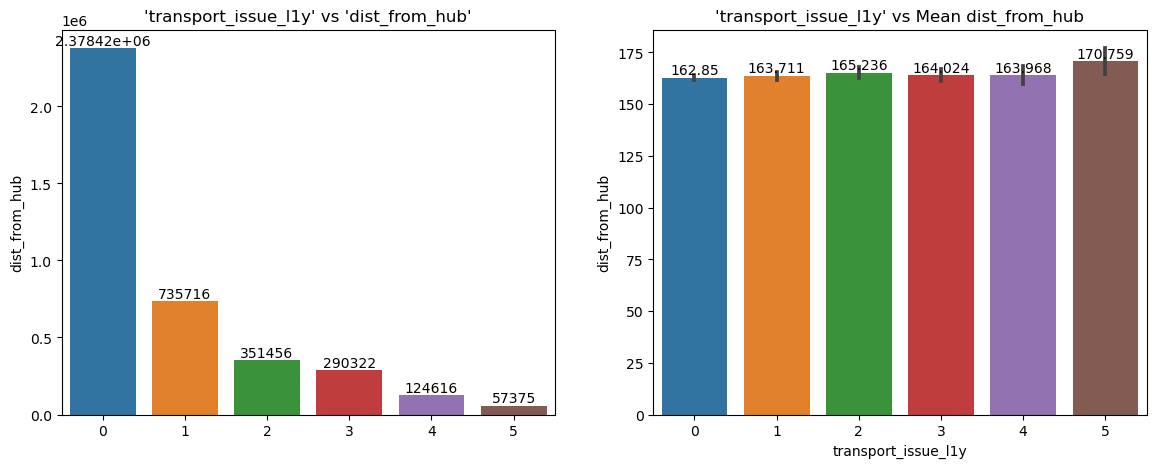

In [16]:
f,axes = plt.subplots(1,2,figsize=(14,5))
grp = df.groupby(['transport_issue_l1y']).sum()
y = grp['dist_from_hub']
x = np.unique(df['transport_issue_l1y'])    
ax = sns.barplot(x=x,y=y, ax=axes[0])
ax.set(title=f"'transport_issue_l1y' vs 'dist_from_hub'")
for i in ax.containers:
    ax.bar_label(i)
    
ax = sns.barplot(x = df['transport_issue_l1y'], y =df['dist_from_hub'],ax=axes[1])
ax.set(title=f"'transport_issue_l1y' vs Mean dist_from_hub")
for i in ax.containers:
    ax.bar_label(i)

We see that maximum amount of distance has been managed with 0 transportation issues in the last one year. But from the second plot, we see that with increase in transportation issues, the mean distance from hub is higher. 

### Inference - 3
As inferred earlier, the demand and revenue coming from rural area is good enough to compensate the costs incurred. It is to be seen if revenue generated in urban areas is enough to cover the costs incurred.
- Large, Mid and Small are ordinal in nature.
- Higher distance, higher transportation issues.



### ---

Refills are going to be done based on the order placed by retailers to distributors. Distributors will order for refill from the manufacturing hub. We need to see if the number of refills are proportionate to the number of distributors.

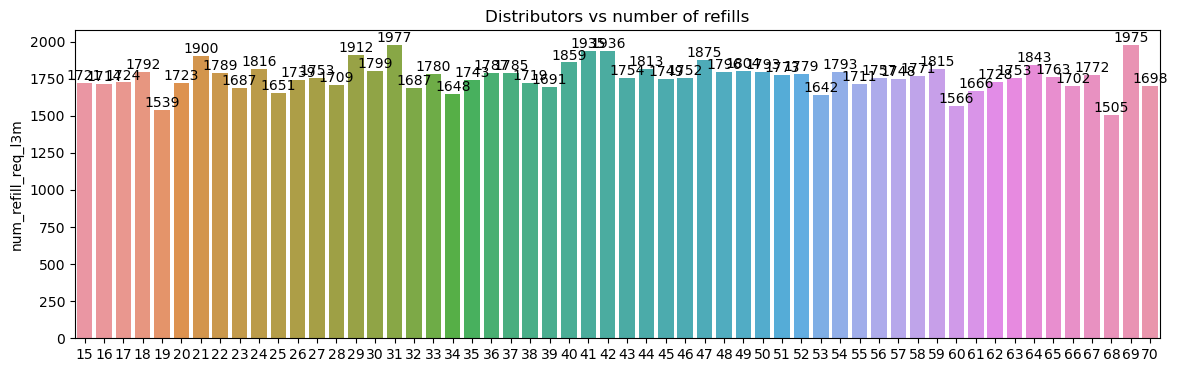

In [17]:
plt.figure(figsize=(14,4))
grp = df.groupby(['distributor_num']).sum()
y = grp['num_refill_req_l3m']
x = np.unique(df['distributor_num'])    
ax = sns.barplot(x=x,y=y)
ax.set(title=f"Distributors vs number of refills")
for i in ax.containers:
    ax.bar_label(i)


There is no particular pattern where number of distributors in the warehouse area may influence the number of refills ordered.

In [18]:
df["Total_issues_l3m"] = df["wh_breakdown_l3m"] + df["storage_issue_reported_l3m"]
df_north_rur = df[(df['zone']=="North") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_north_urb = df[(df['zone']=="North") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_east_rur = df[(df['zone']=="East") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_east_urb = df[(df['zone']=="East") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_south_rur = df[(df['zone']=="South") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_south_urb = df[(df['zone']=="South") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')
df_west_rur = df[(df['zone']=="West") & (df["Location_type"]=="Rural")].sort_values(by='WH_regional_zone')
df_west_urb = df[(df['zone']=="West") & (df["Location_type"]=="Urban")].sort_values(by='WH_regional_zone')

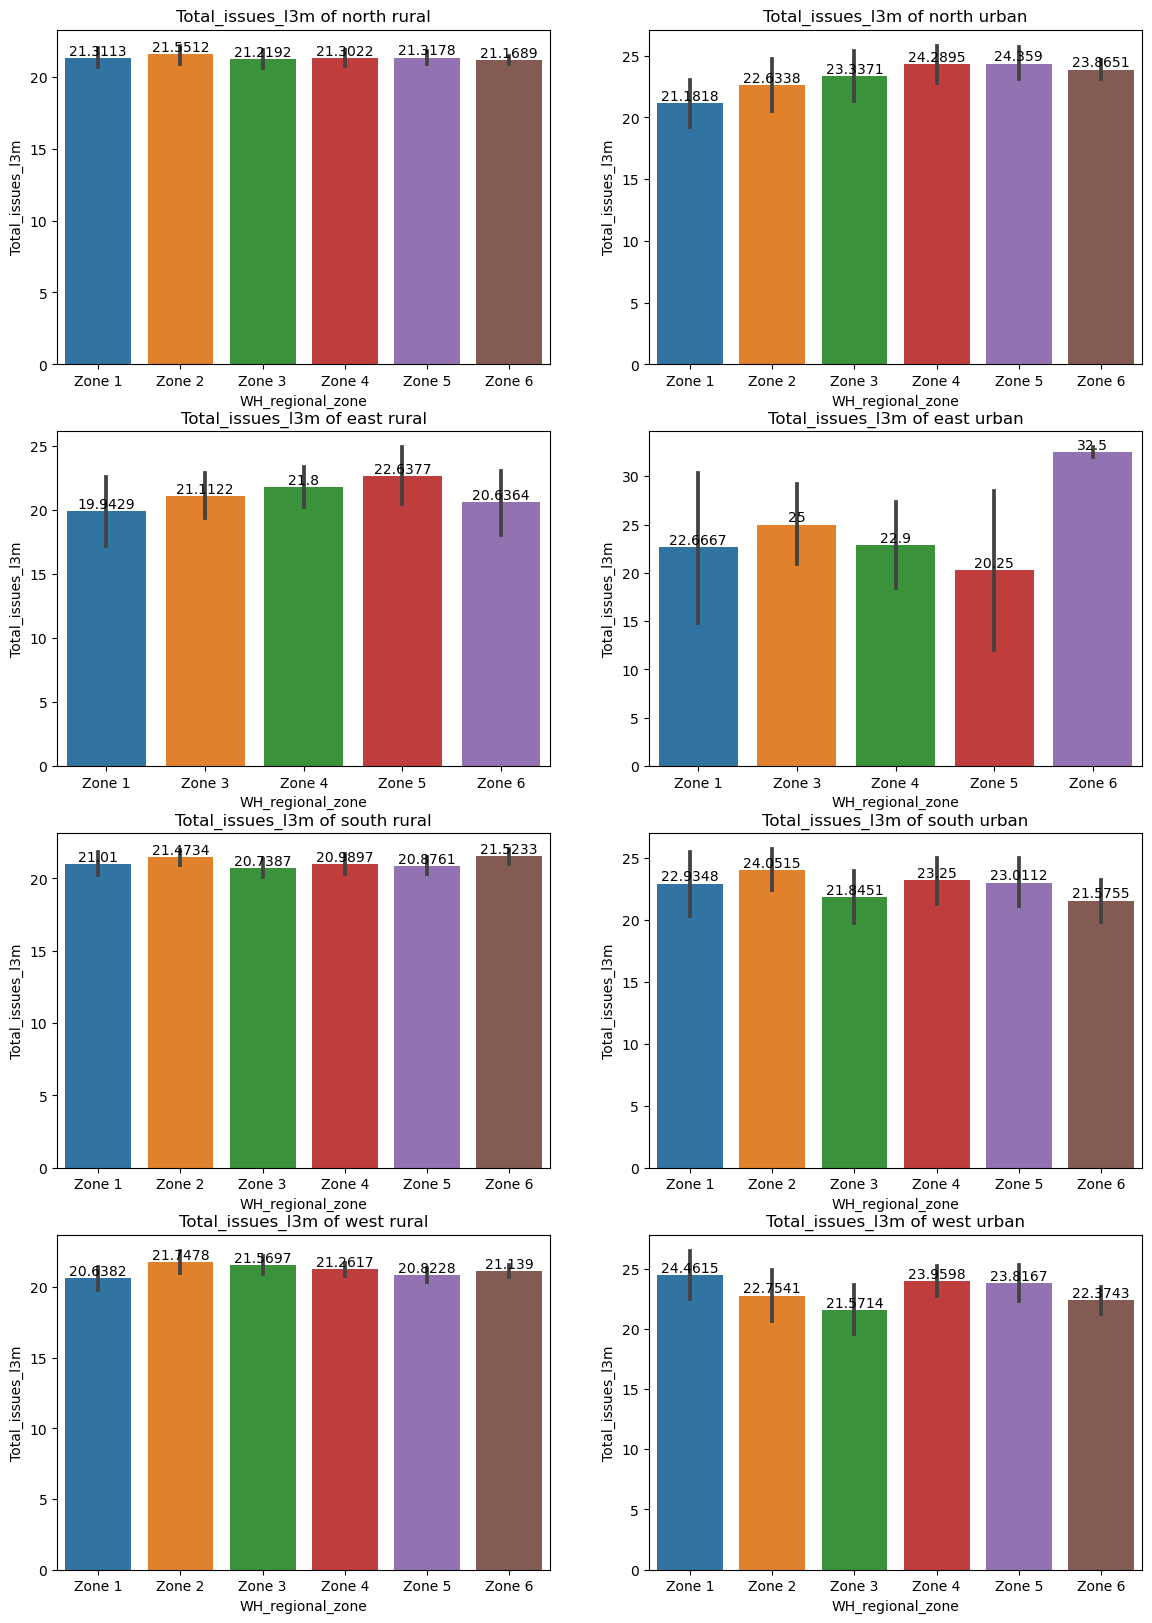

In [19]:
f,axes = plt.subplots(4,2,figsize=(14,20))
ax = sns.barplot(x = df_north_rur["WH_regional_zone"],y=df_north_rur["Total_issues_l3m"],ax = axes[0,0])
ax.set(title=f"Total_issues_l3m of north rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_north_urb["WH_regional_zone"],y=df_north_urb["Total_issues_l3m"],ax = axes[0,1])
ax.set(title=f"Total_issues_l3m of north urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_east_rur["WH_regional_zone"],y=df_east_rur["Total_issues_l3m"],ax = axes[1,0])
ax.set(title=f"Total_issues_l3m of east rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_east_urb["WH_regional_zone"],y=df_east_urb["Total_issues_l3m"],ax = axes[1,1])
ax.set(title=f"Total_issues_l3m of east urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_south_rur["WH_regional_zone"],y=df_south_rur["Total_issues_l3m"],ax = axes[2,0])
ax.set(title=f"Total_issues_l3m of south rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_south_urb["WH_regional_zone"],y=df_south_urb["Total_issues_l3m"],ax = axes[2,1])
ax.set(title=f"Total_issues_l3m of south urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_west_rur["WH_regional_zone"],y=df_west_rur["Total_issues_l3m"],ax = axes[3,0])
ax.set(title=f"Total_issues_l3m of west rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df_west_urb["WH_regional_zone"],y=df_west_urb["Total_issues_l3m"],ax = axes[3,1])
ax.set(title=f"Total_issues_l3m of west urban")
for i in ax.containers:
    ax.bar_label(i)

    - North - Rural --> Maximum = Zone-2 = 21.55 & Minimum = Zone-6 = 21.16
    - East  - Rural --> Maximum = Zone-5 = 22.63 & Minimum = Zone-1 = 19.94 
    - South - Rural --> Maximum = Zone-6 = 21.52 & Minimum = Zone-3 = 20.73   
    - West  - Rural --> Maximum = Zone-2 = 21.74 & Minimum = Zone-1 = 20.63 
    
    - North - Urban --> Maximum = Zone-5 = 24.36 & Minimum = Zone-1 = 21.18
    - East  - Urban --> Maximum = Zone-6 = 32.5  & Minimum = Zone-5 = 20.25  
    - South - Urban --> Maximum = Zone-2 = 24.05 & Minimum = Zone-6 = 21.57  
    - West  - Urban --> Maximum = Zone-1 = 24.46 & Minimum = Zone-3 = 21.57
    
  
    
### Finding-4


- We can see that in rural area, Mid and Large size warehouses have maximum mean number of issues.
- In urban areas, there is a mixed distribution of issues in all three cateogries of warehouses.
- The overall maximum mean number of issues in urban area is more than rural areas even if count of warehouses is significantly lower in urban areas. This may indicate poor maintenance of warehouses in urban areas.

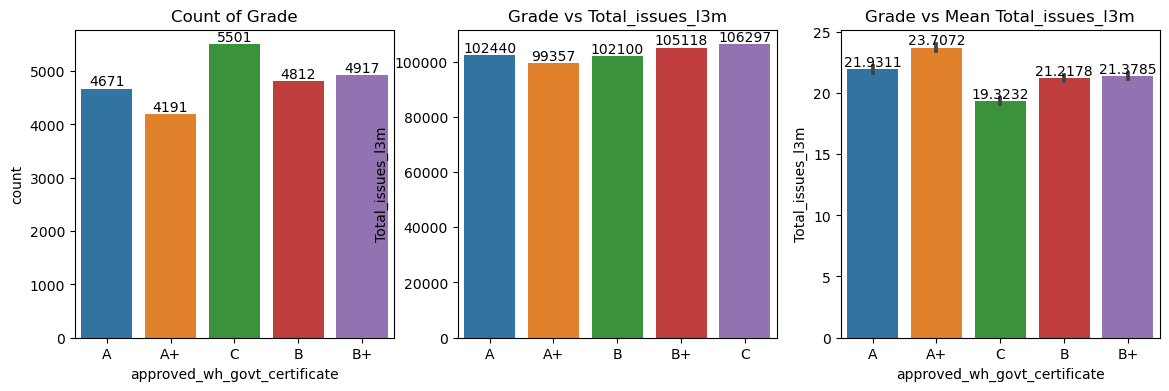

In [20]:
f,axes = plt.subplots(1,3,figsize=(14,4))
col2 = "Total_issues_l3m"
col1 = 'approved_wh_govt_certificate'
ax = sns.countplot(x=df[col1],ax=axes[0])
ax.set(title=f"Count of Grade")
for i in ax.containers:
    ax.bar_label(i)
grp = df.groupby([col1]).sum()
y = grp[col2]
x = np.unique(df[col1])
ax = sns.barplot(x = x,y=y,ax=axes[1])
ax.set(title=f"Grade vs {col2}")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x=df[col1],y = df[col2],ax=axes[2])
ax.set(title=f"Grade vs Mean {col2}")
for i in ax.containers:
    ax.bar_label(i)

Here we can see that the overall total number of issues is highest in C grade warehouses followed by warehouses with B+ grading.
- The count of each category and the total number of issues in the last 3 months are following the same trend.
- However, the mean total number of issues are following the opposite trend.
- This indicates that the overall number of issues are comparable for all categories and the count of each category is decreasing the overall mean.

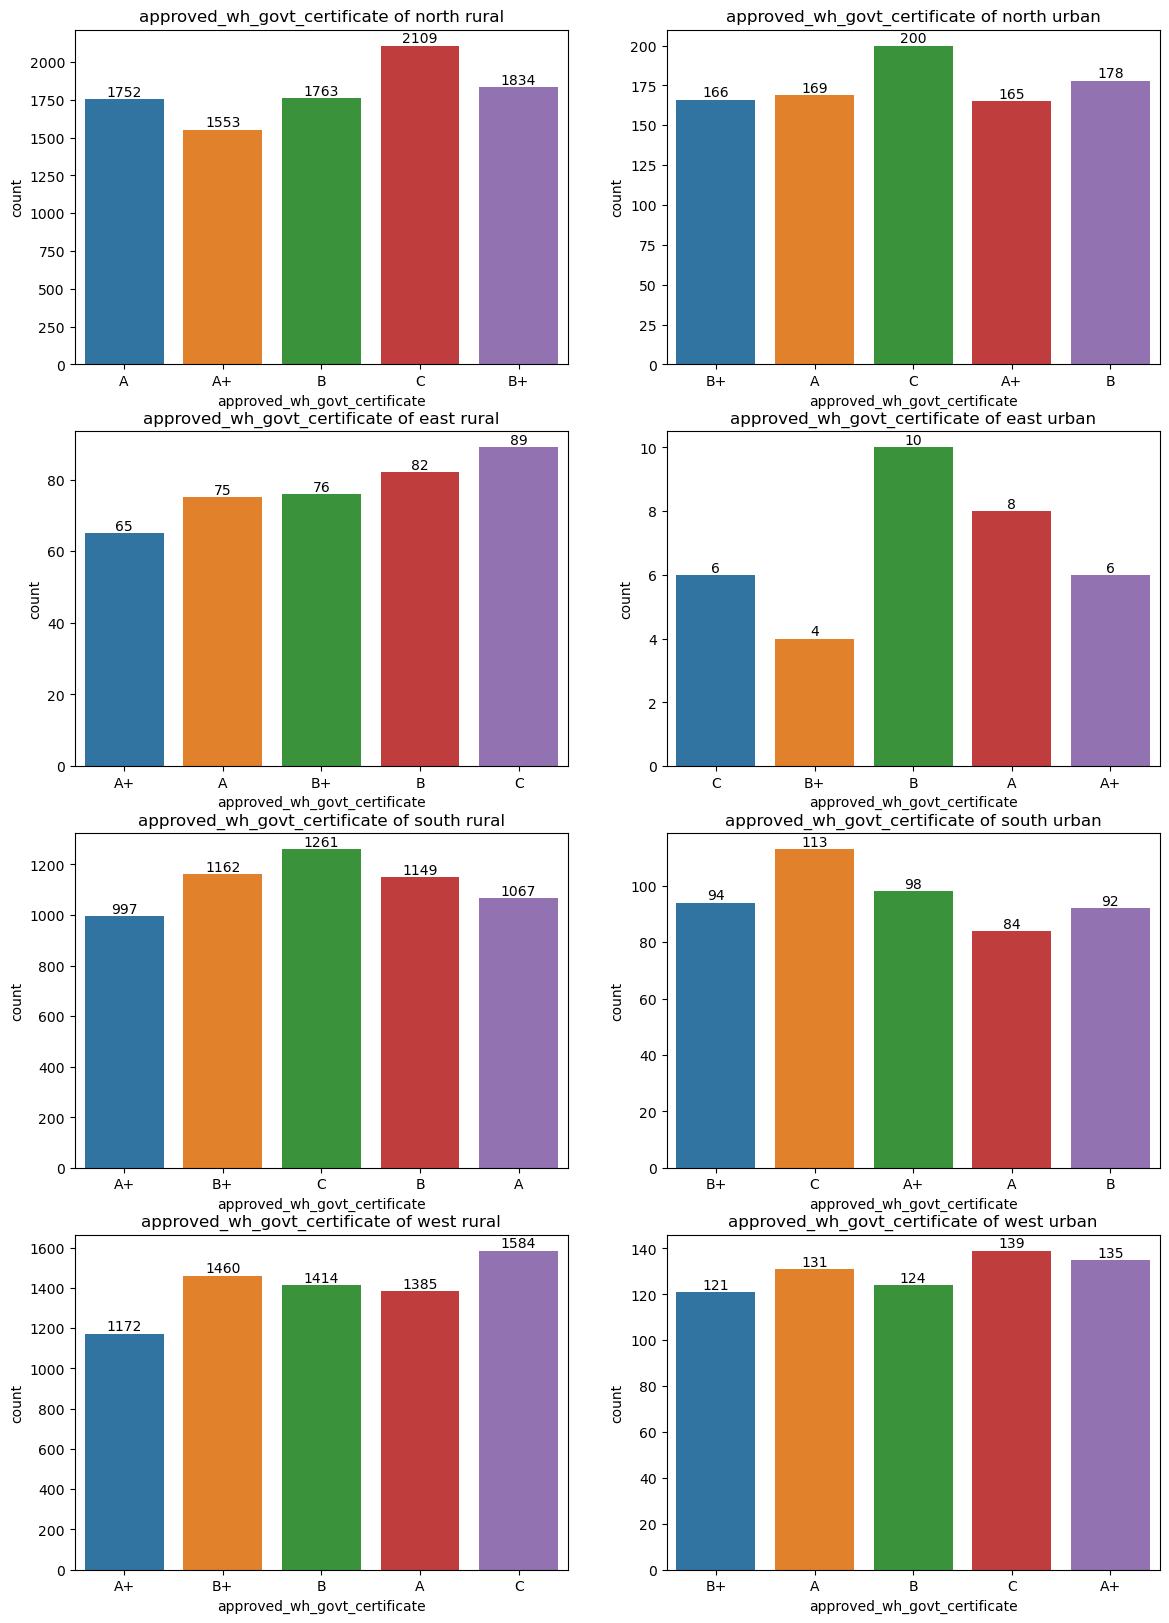

In [21]:
col = 'approved_wh_govt_certificate'
f,axes = plt.subplots(4,2,figsize=(14,20))
ax = sns.countplot(x = df_north_rur[col],ax = axes[0,0])
ax.set(title=f"{col} of north rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_north_urb[col],ax = axes[0,1])
ax.set(title=f"{col} of north urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_east_rur[col],ax = axes[1,0])
ax.set(title=f"{col} of east rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_east_urb[col],ax = axes[1,1])
ax.set(title=f"{col} of east urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_south_rur[col],ax = axes[2,0])
ax.set(title=f"{col} of south rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_south_urb[col],ax = axes[2,1])
ax.set(title=f"{col} of south urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_west_rur[col],ax = axes[3,0])
ax.set(title=f"{col} of west rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_west_urb[col],ax = axes[3,1])
ax.set(title=f"{col} of west urban")
for i in ax.containers:
    ax.bar_label(i)

### Finding-5

- We can see that in rural areas, the maximum count is for C grade warehouses. 
- In urban areas, the maximum count is for C grade warehouses except for East zone.
- Overall a higher number of warehouses have received a C grade in rural areas indicating that these warehouses are not meeting the regulatory benchmarks. We can say that the regulatory benchmarks take into account the total number of issues that have been reported because C graded warehouses have total number of maximum issues in the last 3 months.

### Inference - 3
- Total issues affect the grading.

### Assumption:
As per data dictionary, govt checks are done to inspect the material and storage. Hence, we can assume that more number of issues warranty for more govt checks. We can also assume that lower graded warehouses undergo more govt checks.

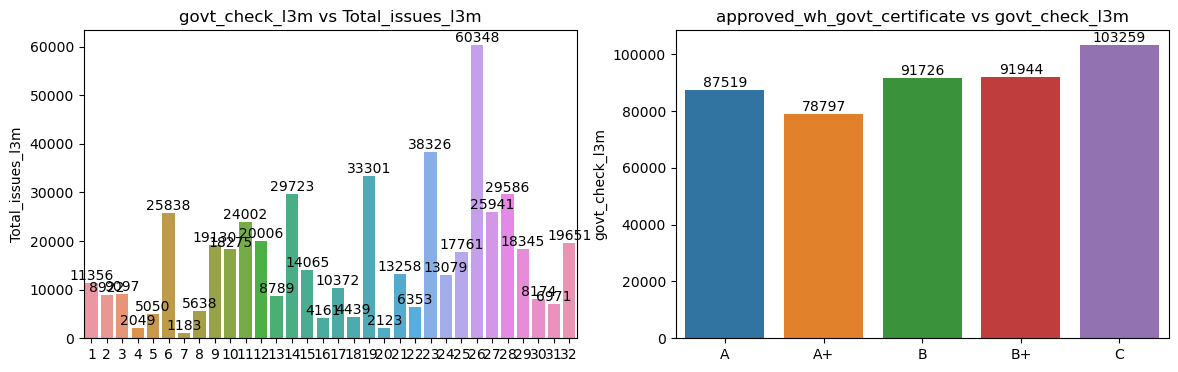

In [22]:
f,axes = plt.subplots(1,2,figsize=(14,4))
col2 = "Total_issues_l3m"
col1 = 'govt_check_l3m'
grp = df.groupby([col1]).sum()
y = grp[col2]
x = np.unique(df[col1])
ax = sns.barplot(x = x,y=y,ax=axes[0])

ax.set(title=f"{col1} vs {col2}")
for i in ax.containers:
    ax.bar_label(i)
col2 = 'govt_check_l3m'
col1 = 'approved_wh_govt_certificate'
grp = df.groupby([col1]).sum()
y = grp[col2]
x = np.unique(df[col1])
ax = sns.barplot(x = x,y=y,ax=axes[1])

ax.set(title=f"{col1} vs {col2}")
for i in ax.containers:
    ax.bar_label(i)

### Finding-6
Our assumption is again partially true. While there is no relationship between number of issues and number of govt checks, there seems to be a relationship between number of govt checks and the grading received. C grade has the highest number of govt checks followed by B+,B,A and lastly A+. 

### Inference-4
- Number of govt checks and grading is correlated. We do not need the govt checks column as it has no direct impact on product quantity or any other columns.
- Grading is also an ordinal column

### Temperature regulation and electrical supply

In [23]:
perc = df.groupby(['electric_supply','temp_reg_mach']).size().unstack(1)
perc["perc"] = (perc[1]/(perc[0] + perc[1])) 
perc

temp_reg_mach,0,1,perc
electric_supply,,,
0,5632,2636,0.318820
1,10890,4934,0.311805



### Finding-8
We can see that out of all warehouses that have electrical supply, only 31% warehouses have temperature regulating machinary. Even for warehouses which do not have electrical supply, 31% warehouses do have temperature regulation. Temperature regulation is important to keep the goods from getting spoilt quickly. This contributes towards optimal shelf life of the product. 

Electrical supply is a necessity for overall working of the warehouse. We can see that a higher percentage of warehouses have electrical supply.

We can also see that temperature regulation is not dependent on electrical supply.

In [24]:
perc = df.groupby(['flood_impacted','flood_proof']).size().unstack(1)
perc["perc"] = (perc[1]/(perc[0] + perc[1])) 
perc

flood_proof,0,1,perc
flood_impacted,,,
0,20714,1010,0.046492
1,2067,301,0.127111


In [25]:
df_flood = df[(df['flood_impacted']==1) & (df['flood_proof']==1)]

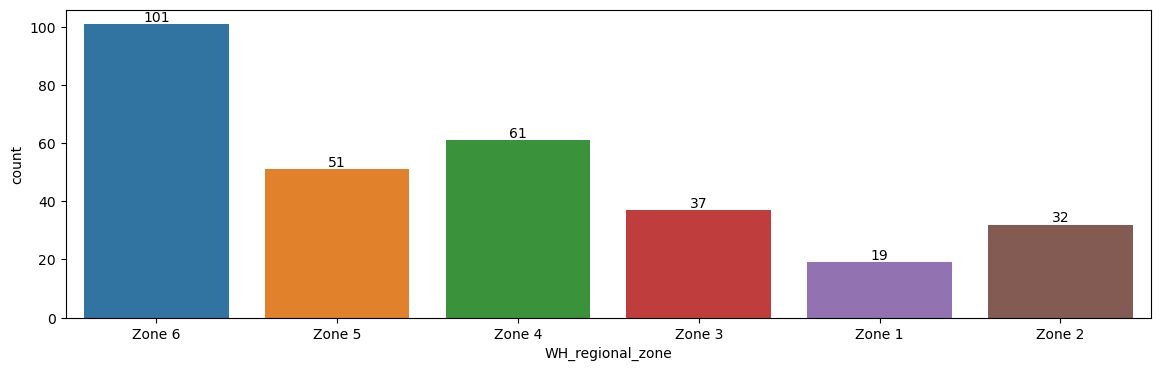

In [26]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x = df_flood["WH_regional_zone"])
for i in ax.containers:
    ax.bar_label(i)

### Finding-9

We can see that majority of the warehouses are not in flood impacted area. Out of these around 5% have been flood proofed. Only 12% of the warehouses which are located in flood impacted areas have been flood proofed. These have been done according to the demand. Zone-6 has most number of warehouses with flood-proofing. 

As majority of data is neither in flood impacted area nor is flood proofed, we can infer that these two columns will not have a great impact on the overall data. Hence, we can consider dropping them.


### Inference-5
- Flood related columns can be dropped
- Temperature and electrical supply are necessary for the maintenance of the warehouse. 

### Assumption:
The number of workers will be proportional to the size of the warehouse. Where there is larger demand, the percentage of company owned warehouses might be larger. As the revenue is large, the company can buy and maintain these warehouses.

Do the number of workers have an impact our target? We must check if the number of workers affect the total number of issues in the warehouse as adequate staffing should decrease number of issues.

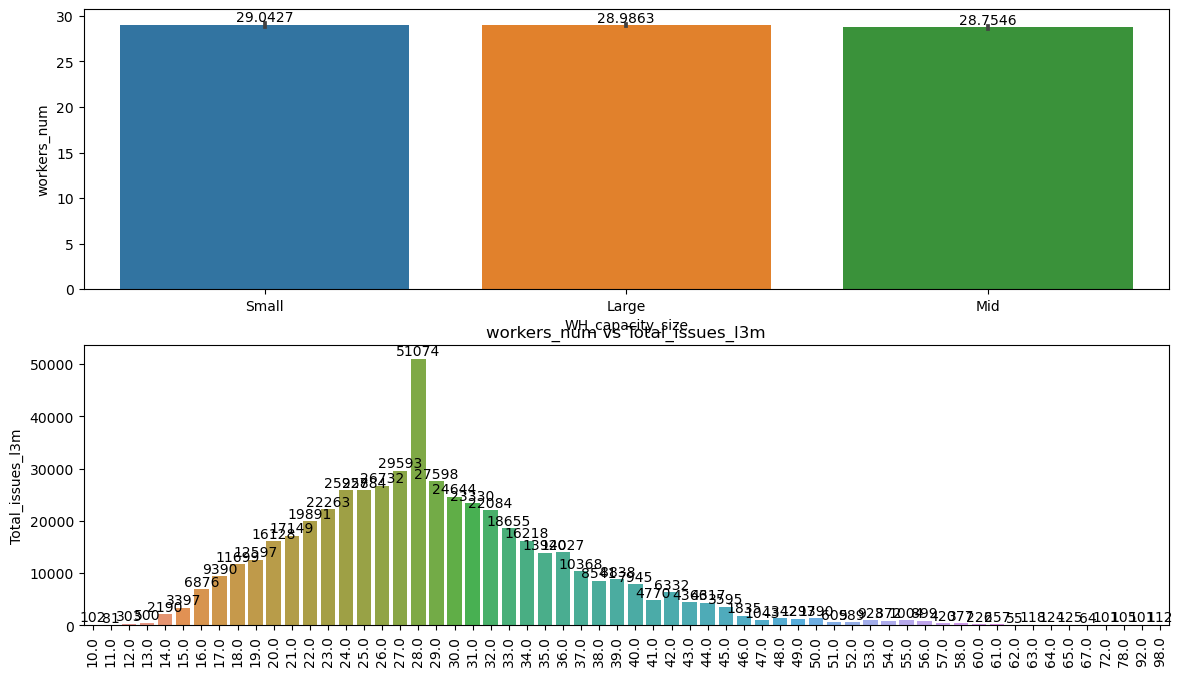

In [27]:
f,axes = plt.subplots(2,1,figsize=(14,8))
ax = sns.barplot(x = df['WH_capacity_size'], y = df['workers_num'],ax=axes[0])
for i in ax.containers:
    ax.bar_label(i)
col2 = "Total_issues_l3m"
col1 = 'workers_num'
grp = df.groupby([col1]).sum()
y = grp[col2]
x = np.unique(df[col1])
ax = sns.barplot(x = x,y=y,ax=axes[1])
plt.xticks(rotation=90)
ax.set(title=f"{col1} vs {col2}")
for i in ax.containers:
    ax.bar_label(i)

Mean number of workers has comparable values for all warehouses sizes. The total number of issues with the increase in the number of workers increase and then decrease. We can say that maximum issues occur when number of workers are in the range of 15 and 45.  

In [28]:
df_small = df[(df['WH_capacity_size']=='Small')]
df_mid = df[(df['WH_capacity_size']=='Mid')]
df_large = df[(df['WH_capacity_size']=='Large')]

[Text(0.5, 1.0, 'Workers dist in Large WH')]

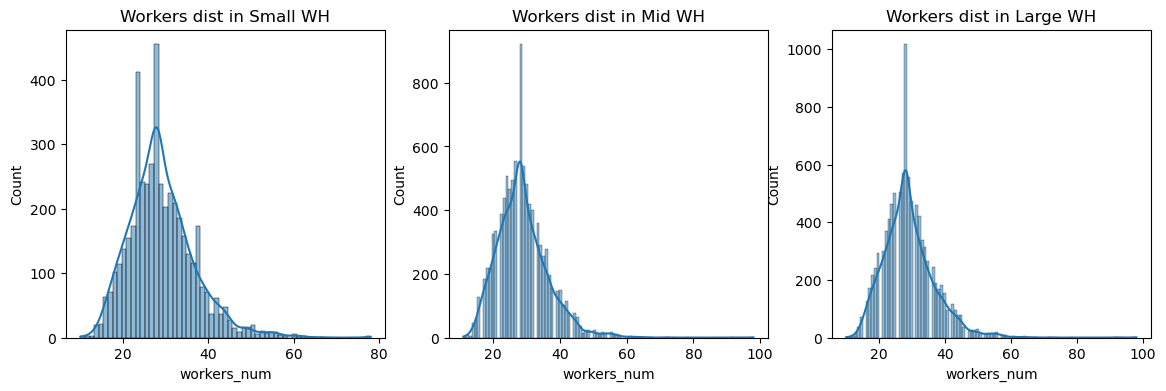

In [29]:
f,axes = plt.subplots(1,3,figsize=(14,4))
sns.histplot(data = df_small['workers_num'],kde=True,ax=axes[0]).set(title="Workers dist in Small WH")
sns.histplot(data = df_mid['workers_num'],kde=True,ax=axes[1]).set(title="Workers dist in Mid WH")
sns.histplot(data = df_large['workers_num'],kde=True,ax=axes[2]).set(title="Workers dist in Large WH")

The distribution of workers is exactly same for Small, Mid and Large warehouses. We cannot conclude that the number of workers employed is directly dependent on the size of the warehouse. 

### Region-wise Ownership

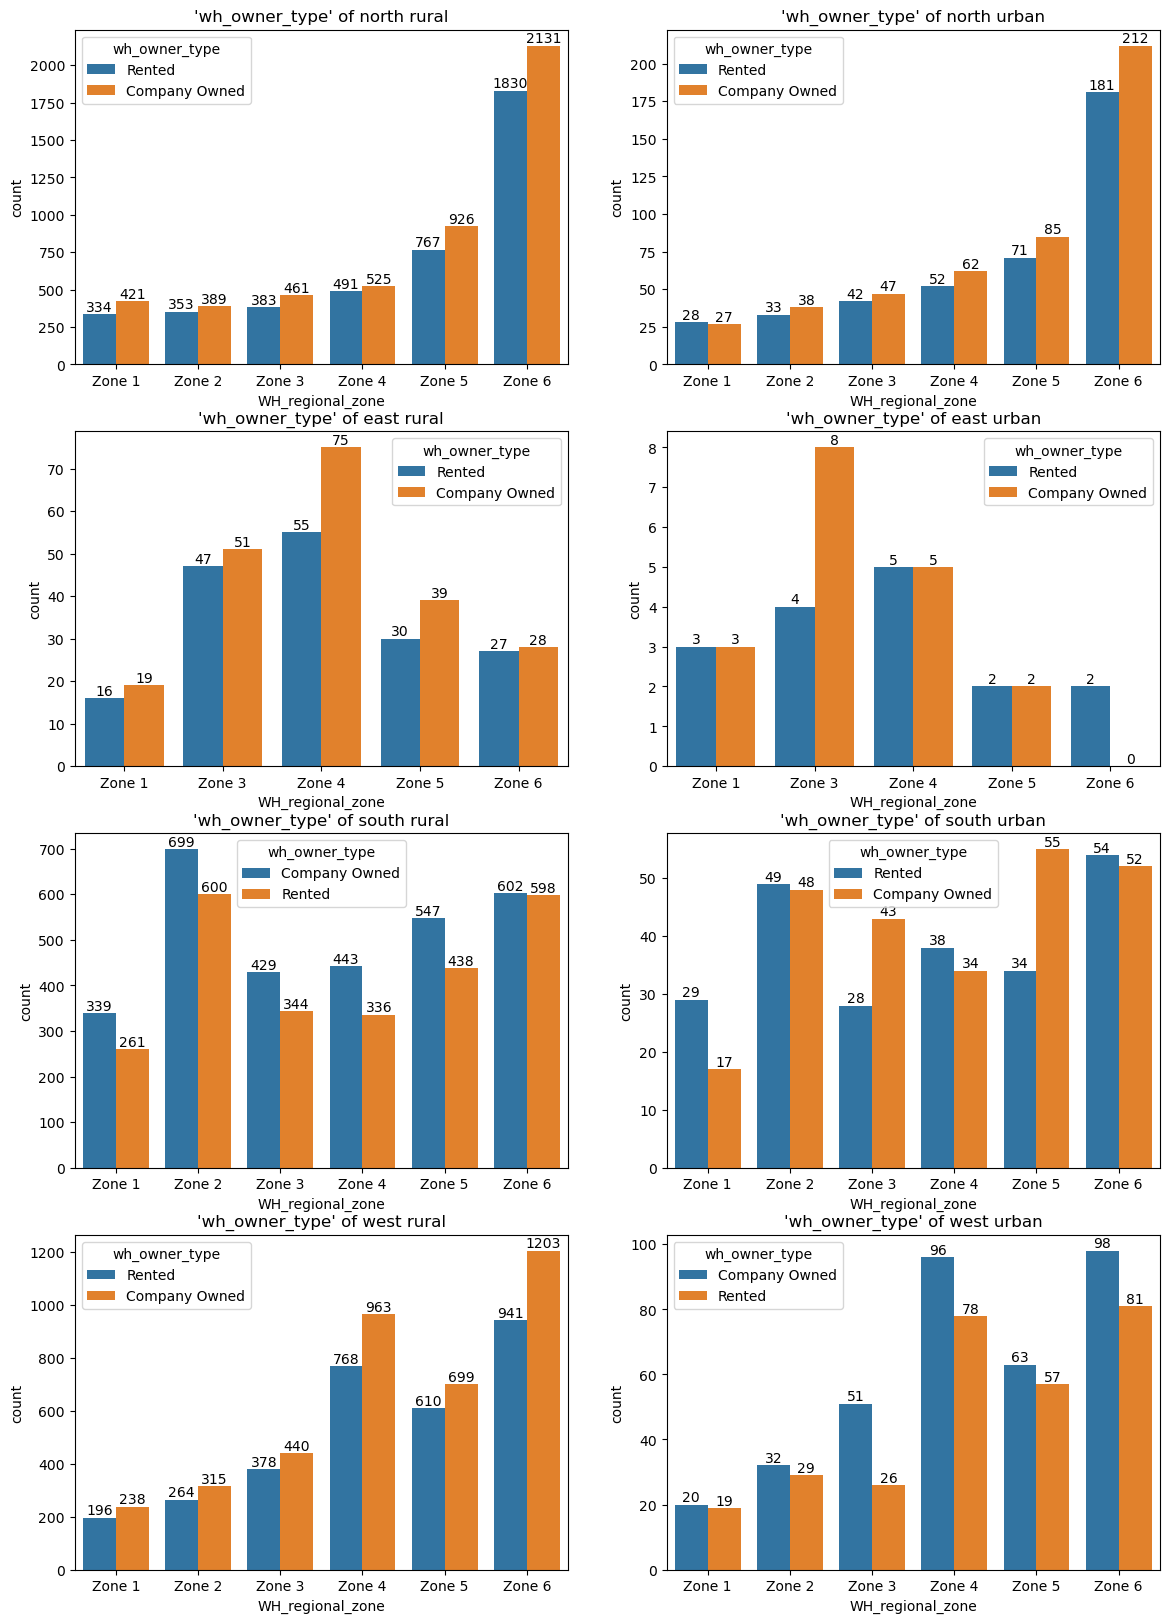

In [30]:
f,axes = plt.subplots(4,2,figsize=(14,20))
ax = sns.countplot(x = df_north_rur["WH_regional_zone"],hue=df_north_rur['wh_owner_type'],ax = axes[0,0])
ax.set(title=f"'wh_owner_type' of north rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_north_urb["WH_regional_zone"],hue=df_north_urb['wh_owner_type'],ax = axes[0,1])
ax.set(title=f"'wh_owner_type' of north urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_east_rur["WH_regional_zone"],hue=df_east_rur['wh_owner_type'],ax = axes[1,0])
ax.set(title=f"'wh_owner_type' of east rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_east_urb["WH_regional_zone"],hue=df_east_urb['wh_owner_type'],ax = axes[1,1])
ax.set(title=f"'wh_owner_type' of east urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_south_rur["WH_regional_zone"],hue=df_south_rur['wh_owner_type'],ax = axes[2,0])
ax.set(title=f"'wh_owner_type' of south rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_south_urb["WH_regional_zone"],hue=df_south_urb['wh_owner_type'],ax = axes[2,1])
ax.set(title=f"'wh_owner_type' of south urban")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_west_rur["WH_regional_zone"],hue=df_west_rur['wh_owner_type'],ax = axes[3,0])
ax.set(title=f"'wh_owner_type' of west rural")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df_west_urb["WH_regional_zone"],hue=df_west_urb['wh_owner_type'],ax = axes[3,1])
ax.set(title=f"'wh_owner_type' of west urban")
for i in ax.containers:
    ax.bar_label(i)

    - North - Rural --> Maximum = Zone-6 = 3961 --> C-O = 2131 & Minimum = Zone-2 = 742 --> C-O = 389 
    - East  - Rural --> Maximum = Zone-4 = 130 --> C-O = 75  & Minimum = Zone-1 = 35 --> C-O = 19 
    - South - Rural --> Maximum = Zone-2 = 1299 --> C-O = 699 & Minimum = Zone-1 = 600 --> C-O = 339   
    - West  - Rural --> Maximum = Zone-6 = 2144 --> C-O = 1203 & Minimum = Zone-1 = 434 --> C-O = 238
    
    - North - Urban --> Maximum = Zone-6 = 393 --> C-O = 212 & Minimum = Zone-1 = 55 --> R=28  
    - East  - Urban --> Maximum = Zone-3 = 12 --> C-O = 8  & Minimum = Zone-6 = 2 --> R =2  
    - South - Urban --> Maximum = Zone-6 = 106  --> R = 54 & Minimum = Zone-1 = 46 --> R = 29 
    - West  - Urban --> Maximum = Zone-6 = 179 --> C-O = 98 & Minimum = Zone-1 = 39  --> C-O = 20 
    
### Finding-10
    
- In rural areas, all of the maximum demand warehouses have a higher percentage of company-owned warehouses
- In Urban areas, all of the maximum demand warehouses have a higher percentage of company-owned warehouses (except South). The zones with minimum count warehouses in urban areas have more percentage of rented warehouses.
- This proves that wherever demand is lesser, it is cheaper and easier to rent a warehouse than to own one.

### Inference-6
- We cannot conclude that the number of workers are proportional to the size of the warehouse. 

- Because of higher demand and revenue, the company can invest this money in maintaining its own warehouses in the area.


Creating a copy of dataset so that original dataset need not be distrubed.

In [31]:
df1 = df.copy()

### Encoding categorical columns

In [32]:
#Manually encoding ordinal columns
df1['WH_capacity_size'] = df1['WH_capacity_size'].map({'Small':0,'Mid':1,'Large':2})
df1['approved_wh_govt_certificate'] = df1['approved_wh_govt_certificate'].map({'C':0,'B':1,'B+':2,'A':3,'A+':4})

#Label encoding
enc_cols = ['Location_type','zone','WH_regional_zone','wh_owner_type']
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
for i in enc_cols:
    df1[i] = obj.fit_transform(df1[i])

### Finding correlations

<Axes: >

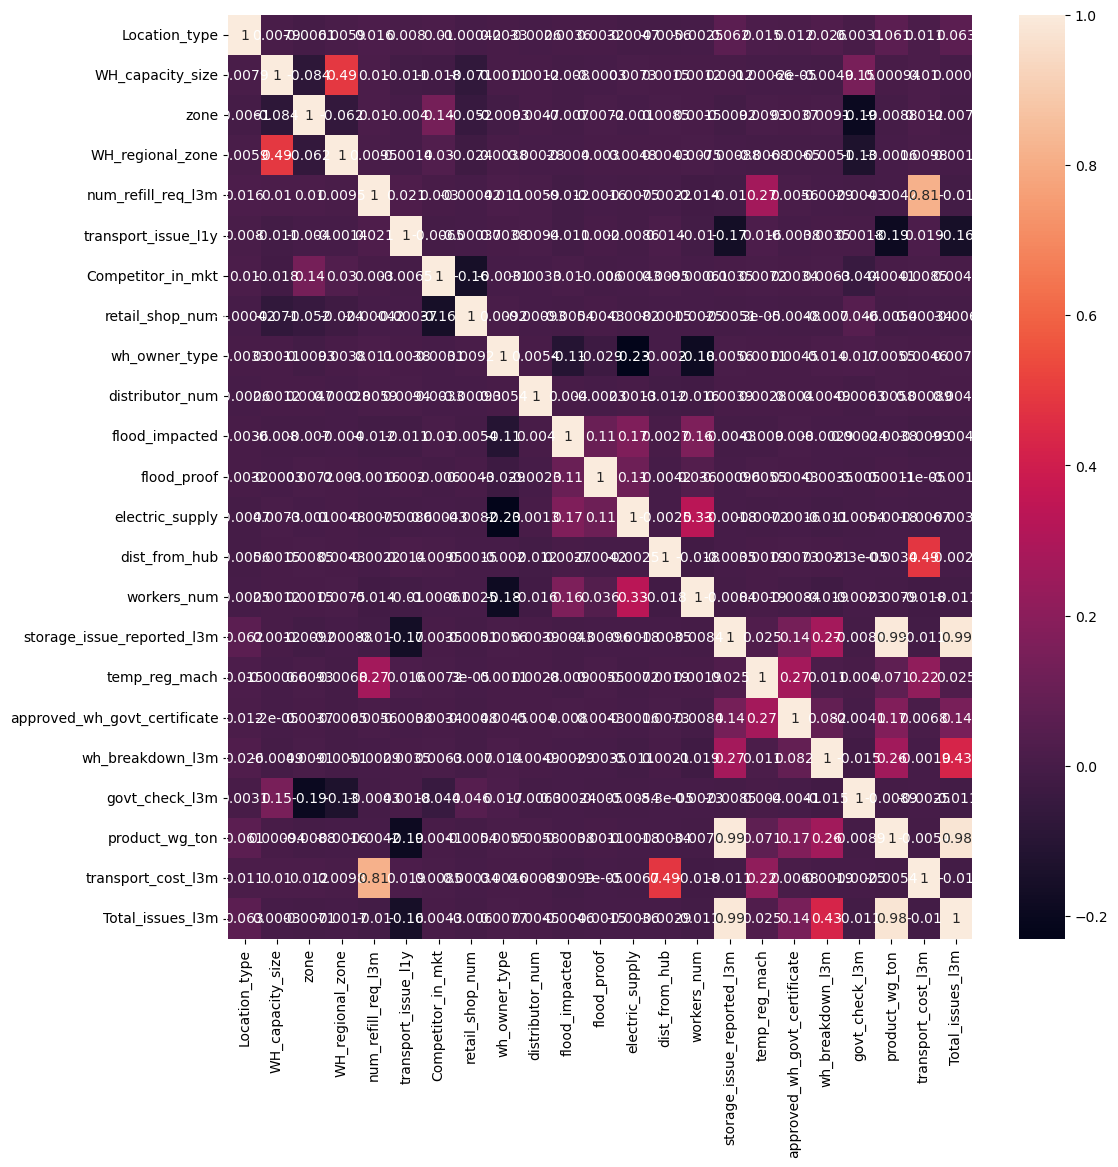

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)

We can see that there are 2 highly correlated columns
- Number of refills and transport_cost_l3m. This has been created by us to calculate the cost during our analysis. So we can drop the column.
- Another surprising highly positive correlation is between total number of issues and product shipment quantity. This means that more product shipment leads to more number of issues.  

In [34]:
df1.drop(columns = ['transport_cost_l3m', 'Total_issues_l3m','flood_impacted','flood_proof'],inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 24092 non-null  int32  
 1   WH_capacity_size              24092 non-null  int64  
 2   zone                          24092 non-null  int32  
 3   WH_regional_zone              24092 non-null  int32  
 4   num_refill_req_l3m            24092 non-null  int64  
 5   transport_issue_l1y           24092 non-null  int64  
 6   Competitor_in_mkt             24092 non-null  int64  
 7   retail_shop_num               24092 non-null  int64  
 8   wh_owner_type                 24092 non-null  int32  
 9   distributor_num               24092 non-null  int64  
 10  electric_supply               24092 non-null  int64  
 11  dist_from_hub                 24092 non-null  int64  
 12  workers_num                   24092 non-null  float64
 13  s

### Standardization

In [36]:
X = df1.drop(columns = ['product_wg_ton'])
y = df1['product_wg_ton']

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(X)

In [38]:
cols = X.columns
X = pd.DataFrame(sc, columns = cols)

### Splitting data into training and testing set

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=23)

### Model Building and Evaluation

In [40]:
#Importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [41]:
model_lr = LinearRegression()
model_rfr = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()

#### Linear Regression

In [42]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, mean_absolute_percentage_error
import math
#For model 1, i.e., Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test,y_pred_lr)
rmse_lr = math.sqrt(mse_lr)
r2s_lr = r2_score(y_test, y_pred_lr)
print(f"The Mean Square Error for {model_lr} is {mse_lr}")
print(f"The Root Mean Square Error for {model_lr} is {rmse_lr}")
print(f"The Mean Absolute Error for {model_lr} is {mae_lr}")
print(f"The Mean Absolute Percentage Error for {model_lr} is {mape_lr}")
print(f"The R2 score for {model_lr} is {r2s_lr}")

The Mean Square Error for LinearRegression() is 1927156.422313307
The Root Mean Square Error for LinearRegression() is 1388.2205956955497
The Mean Absolute Error for LinearRegression() is 1081.6951390452434
The Mean Absolute Percentage Error for LinearRegression() is 0.05560363140473486
The R2 score for LinearRegression() is 0.9851376294292506


Our linear regression model has performed very well on the data:
- Mean Square Error = 1927156.42
- Root Mean Squared Error = 1388.22
- Mean Absolute Error = 1081.69
- Mean Absolute Percentage Error = 5.5%
- R2 score = 0.98 --> This means that 98% of the variation in Target variable is explained by variation in independent variables.

#### Gradient Boosting Regressor

In [43]:
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

#For model 2, i.e., Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test,y_pred_gbr)
mape_gbr = mean_absolute_percentage_error(y_test,y_pred_gbr)
rmse_gbr = math.sqrt(mse_gbr)
r2s_gbr = r2_score(y_test, y_pred_gbr)
print(f"The Mean Square Error for {model_gbr} is {mse_gbr}")
print(f"The Root Mean Square Error for {model_gbr} is {rmse_gbr}")
print(f"The Mean Absolute Error for {model_gbr} is {mae_gbr}")
print(f"The Mean Absolute Percentage Error for {model_gbr} is {mape_gbr}")
print(f"The R2 score for {model_gbr} is {r2s_gbr}")

The Mean Square Error for GradientBoostingRegressor() is 679901.0647609367
The Root Mean Square Error for GradientBoostingRegressor() is 824.561134641293
The Mean Absolute Error for GradientBoostingRegressor() is 649.0558652992516
The Mean Absolute Percentage Error for GradientBoostingRegressor() is 0.03483422365264884
The R2 score for GradientBoostingRegressor() is 0.994756553511212


Our gradient boosting regression model has performed better than linear regression model on the data:
- Mean Square Error = 6799910.06
- Root Mean Squared Error = 824.56
- Mean Absolute Error = 649.06
- Mean Absolute Percentage Error = 3.48%
- R2 score = 0.99 --> This means that 99% of the variation in Target variable is explained by variation in independent variables.

#### Random Forest Regressor

In [44]:
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

#For model 3, i.e., Random Forest Regressor
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test,y_pred_rfr)
mape_rfr = mean_absolute_percentage_error(y_test,y_pred_rfr)
rmse_rfr = math.sqrt(mse_rfr)
r2s_rfr = r2_score(y_test, y_pred_rfr)
print(f"The Mean Square Error for {model_rfr} is {mse_rfr}")
print(f"The Root Mean Square Error for {model_rfr} is {rmse_rfr}")
print(f"The Mean Absolute Error for {model_rfr} is {mae_rfr}")
print(f"The Mean Absolute Percentage Error for {model_rfr} is {mape_rfr}")
print(f"The R2 score for {model_rfr} is {r2s_rfr}")

The Mean Square Error for RandomForestRegressor() is 744242.1298666021
The Root Mean Square Error for RandomForestRegressor() is 862.6946909924751
The Mean Absolute Error for RandomForestRegressor() is 667.8309988931932
The Mean Absolute Percentage Error for RandomForestRegressor() is 0.03586129305242003
The R2 score for RandomForestRegressor() is 0.9942603505349277


Our random forest regression model has performed better than linear regression model but worse than gradient boosting regression model on the data:
- Mean Square Error = 744242.13
- Root Mean Squared Error = 863.69
- Mean Absolute Error = 667.83
- Mean Absolute Percentage Error = 3.59%
- R2 score = 0.99 --> This means that 99% of the variation in Target variable is explained by variation in independent variables.




We will now use Gradient Boosting Regressor model for finalization. We will tune this model to see if we can further reduce error metrics.

#### Cross Validation to regularize our results

In [45]:
scores = cross_val_score(model_gbr,X,y,cv=5,scoring="neg_mean_squared_error")
avg = scores.mean()
   
print(avg)

-693232.365353589


The results after cross validation is also quite good. Mean Squared Error is around 693232.

### Hyper Parameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {"loss":["squared_error","huber"],
              "n_estimators":[30,50,100,180,200],
             "max_depth":[3,4,5,6,7]}

In [23]:
grid = GridSearchCV(model_gbr, param_grid,cv=5,scoring="neg_mean_squared_error")
grid.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['squared_error', 'huber'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [30, 50, 100, 180, 200]},
             scoring='neg_mean_squared_error')

In [24]:
grid.best_params_

{'loss': 'squared_error', 'max_depth': 4, 'n_estimators': 100}

In [25]:
grid.best_score_

-680285.9371373007

After tuning, our mean squared error has reduced to around 680285 which is an improvement. 

### Final Model training and testing

In [30]:
model_gbr = GradientBoostingRegressor(loss='squared_error', max_depth=4, n_estimators=100)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

#For model 3, i.e., Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test,y_pred_gbr)
mape_gbr = mean_absolute_percentage_error(y_test,y_pred_gbr)
rmse_gbr = math.sqrt(mse_gbr)
r2s_gbr = r2_score(y_test, y_pred_gbr)
print(f"The Mean Square Error for {model_gbr} is {mse_gbr}")
print(f"The Root Mean Square Error for {model_gbr} is {rmse_gbr}")
print(f"The Mean Absolute Error for {model_gbr} is {mae_gbr}")
print(f"The Mean Absolute Percentage Error for {model_gbr} is {mape_gbr}")
print(f"The R2 score for {model_gbr} is {r2s_gbr}")

The Mean Square Error for GradientBoostingRegressor(max_depth=4) is 672670.5304901488
The Root Mean Square Error for GradientBoostingRegressor(max_depth=4) is 820.164941027199
The Mean Absolute Error for GradientBoostingRegressor(max_depth=4) is 645.4466992876261
The Mean Absolute Percentage Error for GradientBoostingRegressor(max_depth=4) is 0.034645931718048556
The R2 score for GradientBoostingRegressor(max_depth=4) is 0.9948123159176844


The results of our gradient boosting regression model on the testing set after tuning:
- Mean Square Error = 672670.5
- Root Mean Squared Error = 820.16
- Mean Absolute Error = 645.44
- Mean Absolute Percentage Error = 3.46%
- R2 score = 0.99 --> This means that 99% of the variation in Target variable is explained by variation in independent variables.

### Conclusion

- The goal was to build a model that could help optimize product shipment. The Gradient Boosting Regressoe model can predict the optimized weight with at least 90% accuracy on completely unknown data.
- It can also be observed that the company can benefit by driving advertising campaigns in the Northern Rural locations, specifically in Regional zones 5 and 6 based on the demand patterns.
- It is also seen that small size warehouses in urban areas may not be very profitable as the numbers are small but their distance from the hub is more and they require more refills. 
